In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from typing import List, Dict
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro, normaltest, chi2_contingency
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

Step 2: Loading the training data

In [2]:
df = pd.read_csv("train.csv")
pd.set_option('display.max_columns', None)
sns.set(color_codes=True)

Step 3: displaying and visualizing the data-set

In [3]:
print(df.shape)
df.head()

(60000, 24)


,sha256,size,vsize,imports,exports,has_debug,has_relocations,has_resources,has_signature,has_tls,symbols,numstrings,paths,urls,registry,MZ,printables,avlength,file_type_trid,file_type_prob_trid,A,B,C,label
0,a5d72c609a1594621e8eb775e7324d4fc291d5569cfefd...,6744064,6799360.0,524.0,3.0,0.0,1.0,1.0,0.0,1.0,0.0,64882.0,0.0,0.0,0.0,28.0,899075.0,13.857079,Win32 EXE PECompact compressed (generic),64.2,-3.978981,5.732354,er,1
1,ccaa49b76e6fd84842399c4389e2086a5a3687dfabbf01...,22016,45056.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,89.0,0.0,0.0,0.0,1.0,856.0,9.617978,Win32 Dynamic Link Library (generic),38.4,7.064133,5.738201,er,0
2,b0b126adc73b980a114e38027b082d149fcf491547452f...,686136,704512.0,133.0,4.0,1.0,1.0,1.0,1.0,0.0,0.0,2699.0,0.0,32.0,0.0,2.0,32767.0,12.140422,Win64 Executable (generic),82.0,1.052727,5.722733,gow,0
3,ff6176c53ca9b58040c93870c264843b93b5e290c28e57...,8192,36864.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,71.0,0.0,0.0,0.0,1.0,678.0,9.549296,Win64 Executable (generic),28.0,2.217531,5.896053,vh,1
4,59b8bc6ac157a553440978406c8aa8eb8a25c166af1175...,396288,421888.0,133.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,4729.0,0.0,0.0,0.0,5.0,35881.0,7.587439,Win64 Executable (generic),32.2,9.401164,NaN,vh,1


In [4]:
df.describe()


,size,vsize,imports,exports,has_debug,has_relocations,has_resources,has_signature,has_tls,symbols,numstrings,paths,urls,registry,MZ,printables,avlength,file_type_prob_trid,A,B,label
count,6.000000e+04,5.806500e+04,58261.000000,57907.000000,57073.000000,56676.000000,58039.000000,58063.000000,57102.000000,57344.000000,5.728200e+04,56340.000000,57651.000000,57475.000000,56911.000000,5.726100e+04,57243.000000,60000.000000,56296.000000,56249.000000,60000.000000
mean,1.501019e+06,1.965704e+06,106.195671,30.803271,0.403764,0.543069,0.860456,0.254189,0.234195,40.172468,7.404344e+03,1.644799,12.501292,0.429282,16.263429,1.207710e+05,32.658511,53.678748,4.015404,5.810361,0.500000
std,4.727391e+06,2.017881e+07,213.452315,508.079533,0.490655,0.498146,0.346516,0.435408,0.423498,1239.701661,2.463088e+04,37.003752,71.631716,11.496862,82.193088,6.052203e+05,1094.710748,20.632479,6.368440,0.641208,0.500004
min,2.980000e+02,5.440000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000,5.000000e+00,5.000000,17.500000,-17.783199,0.004929,0.000000
25%,1.070080e+05,1.228800e+05,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,4.750000e+02,0.000000,0.000000,0.000000,1.000000,6.013000e+03,7.447368,38.400000,-0.293525,5.469978,0.000000
50%,4.833280e+05,4.218880e+05,28.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.990500e+03,0.000000,0.000000,0.000000,4.000000,2.283500e+04,12.009456,43.300000,3.658333,5.856659,0.500000
75%,1.239326e+06,1.601536e+06,152.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,5.172000e+03,1.000000,10.000000,0.000000,11.000000,7.615600e+04,17.310647,69.100000,7.863973,6.344090,1.000000
max,3.253537e+08,4.278288e+09,15047.000000,48840.000000,1.000000,1.000000,1.000000,1.000000,1.000000,181660.000000,1.572261e+06,5324.000000,9387.000000,2492.000000,7010.000000,5.034687e+07,207990.925620,100.000000,43.926598,6.584937,1.000000


In [5]:
#calculating the number of missing values in each column of a DataFrame and creates a copy of the DataFrame with missing values filled in with 0

missing_values = df.isnull().sum()
print(missing_values)

main_df = df.copy()

sha256                    0
size                      0
vsize                  1935
imports                1739
exports                2093
has_debug              2927
has_relocations        3324
has_resources          1961
has_signature          1937
has_tls                2898
symbols                2656
numstrings             2718
paths                  3660
urls                   2349
registry               2525
MZ                     3089
printables             2739
avlength               2757
file_type_trid            0
file_type_prob_trid       0
A                      3704
B                      3751
C                      2051
label                     0
dtype: int64


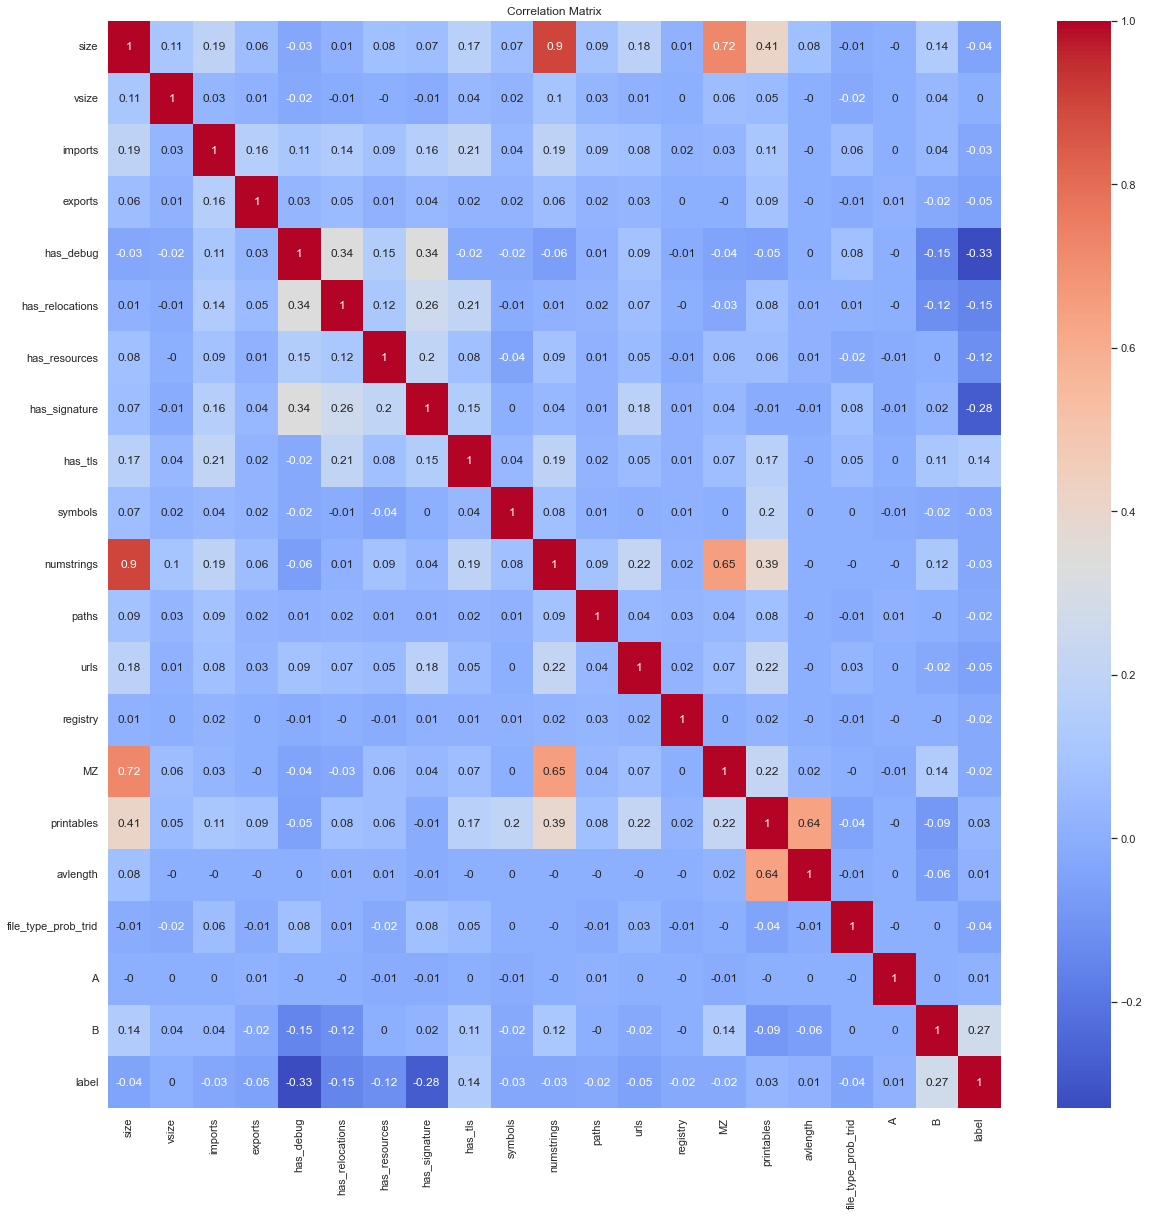

In [6]:

corr_matrix = main_df.corr().round(2)
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title("Correlation Matrix")
plt.show()

NOTE: from this graph we see there are correlations betwen both size and MZ (check that) and size with nmumstirngs and printables

based on ChatGPT: Multiple MZ strings in an EXE file can also indicate that the file has been infected with malware or is otherwise malicious. Some malware authors may add multiple MZ strings to an EXE file in an attempt to evade detection by antivirus software. In this case, the additional MZ strings may contain malicious code or data that is executed when the file is run.


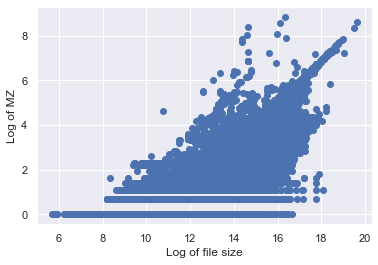

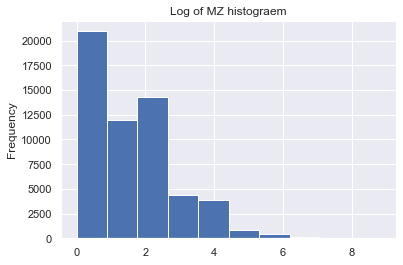

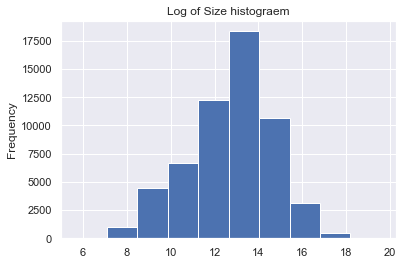

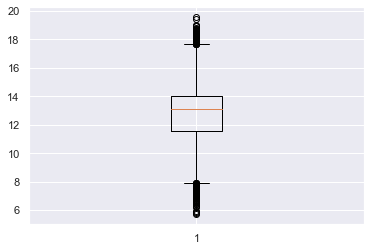

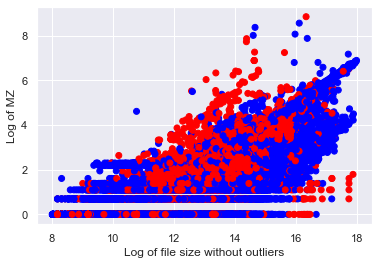

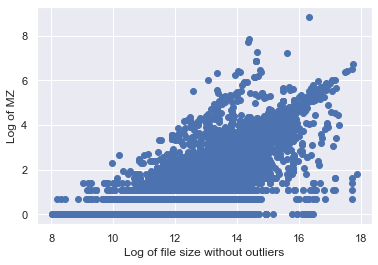

In [7]:
mz = main_df[main_df["MZ"] > 0]["MZ"]
size = main_df[main_df["MZ"] > 0]["size"]

logSize = np.log(size)
logMZ = np.log(mz)
plt.scatter(logSize, logMZ)
plt.xlabel("Log of file size")
plt.ylabel('Log of MZ')
plt.show()
plt.title("Log of MZ histograem")
logMZ.plot.hist()
plt.show()
plt.title("Log of Size histograem")
logSize.plot.hist()
plt.show()
plt.boxplot(logSize)
plt.show()

logSize_no_out = logSize[(logSize < 18) & (logSize > 8)]
MZ_no_out = main_df[(main_df["MZ"] > 0) & ((logSize < 18) & (logSize > 8))]["MZ"]
labels = main_df[(main_df["MZ"] > 0) & ((logSize < 18) & (logSize > 8))]['label']
label_colors = {1: 'red', 0: 'blue'}
plt.scatter(logSize_no_out, np.log(MZ_no_out), c=[label_colors[label] for label in labels])
plt.xlabel("Log of file size without outliers")
plt.ylabel('Log of MZ')
plt.show()
logSize_mal = logSize_no_out[(labels==1)]
mz_mal = MZ_no_out[(labels==1)]
plt.scatter(logSize_mal, np.log(mz_mal))
plt.xlabel("Log of file size without outliers")
plt.ylabel('Log of MZ')
plt.show()

There are 60000 observations


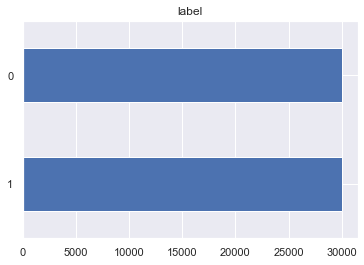

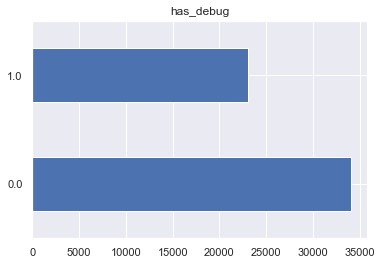

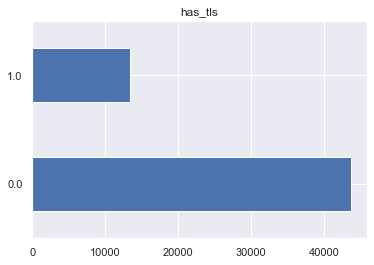

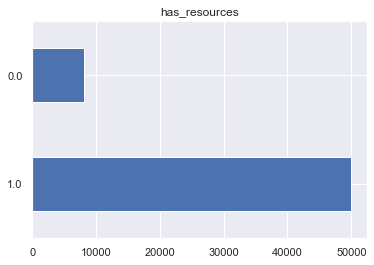

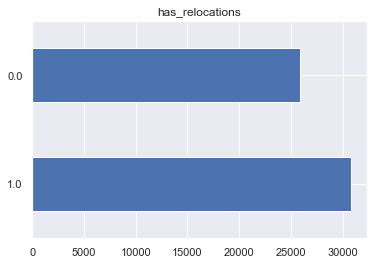

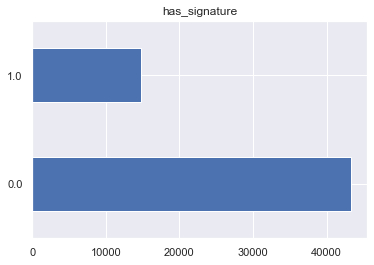

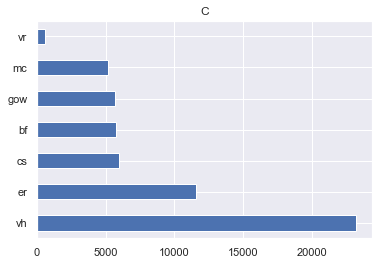

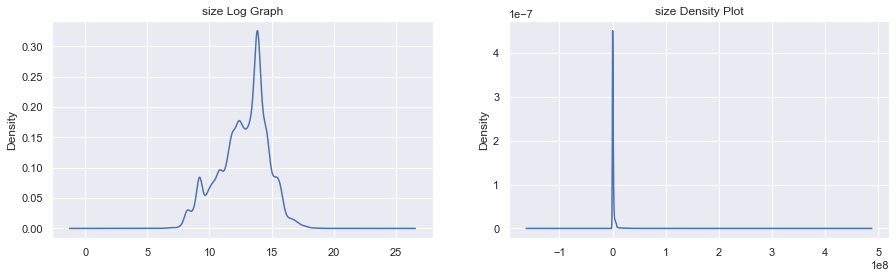

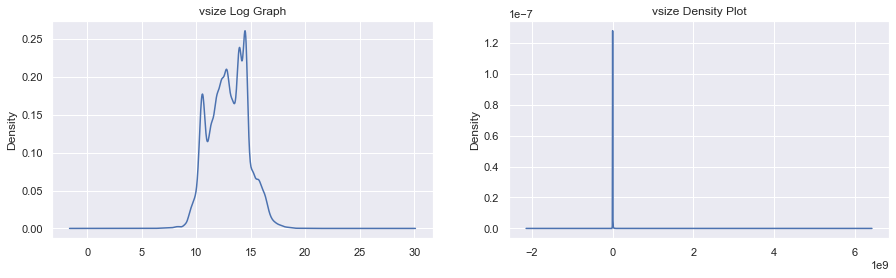

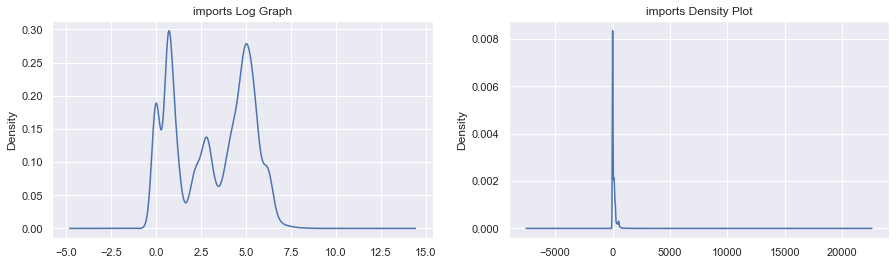

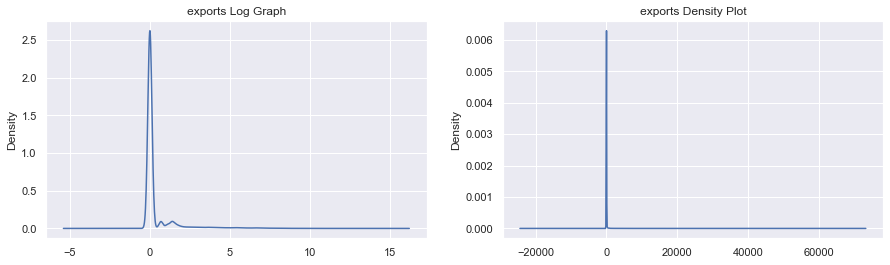

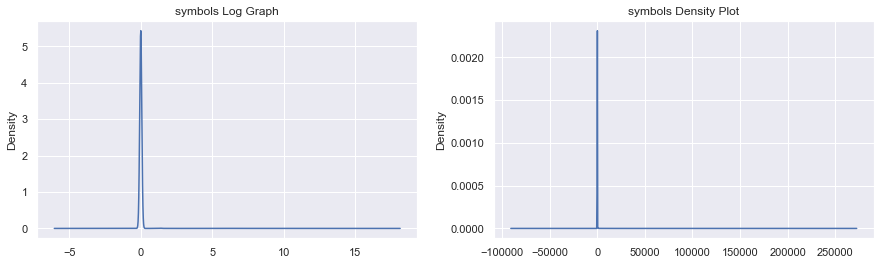

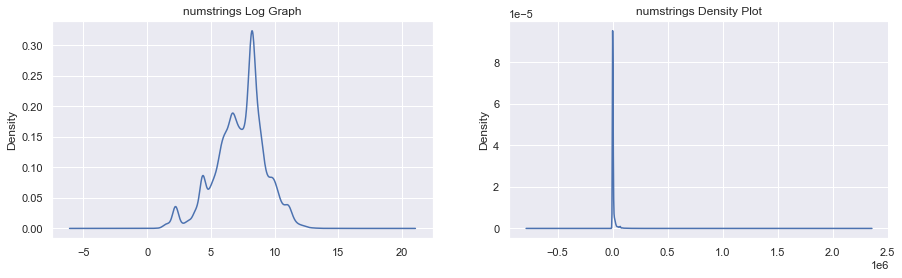

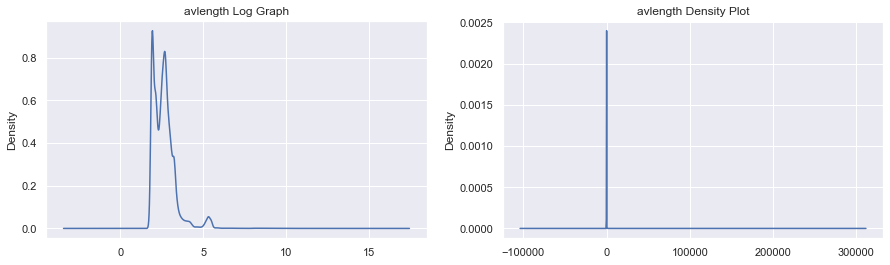

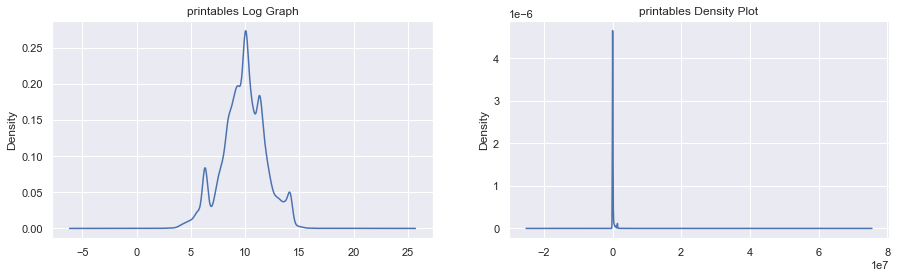

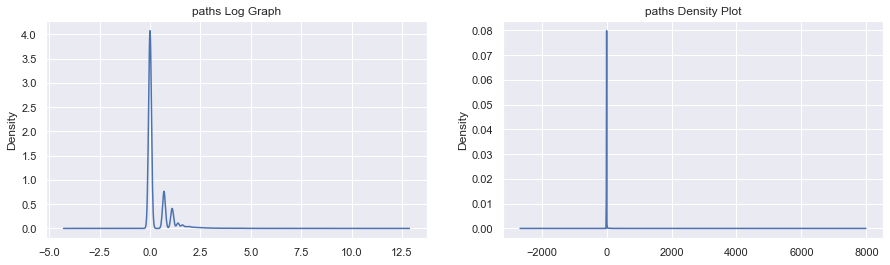

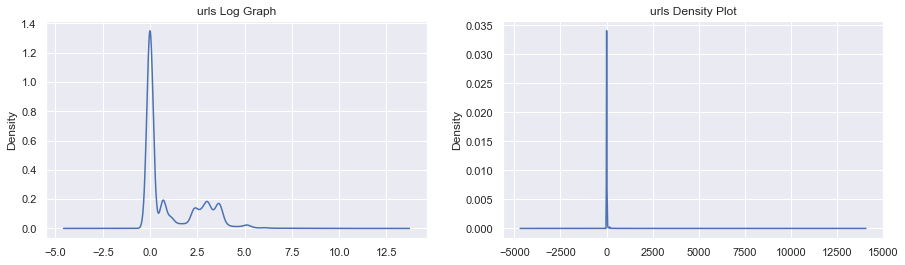

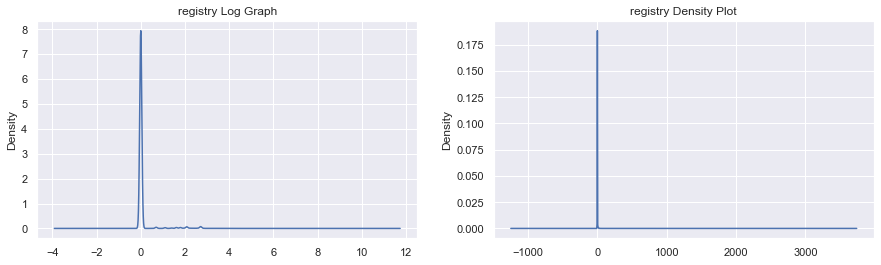

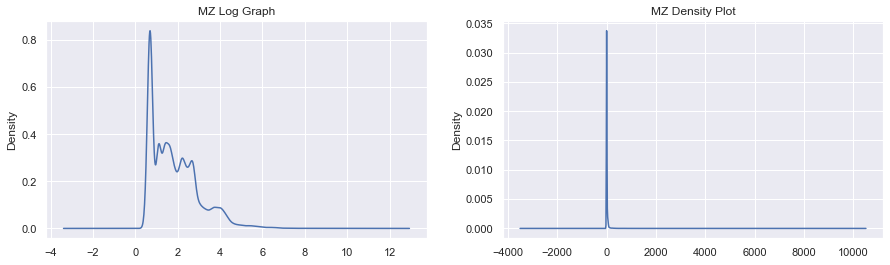

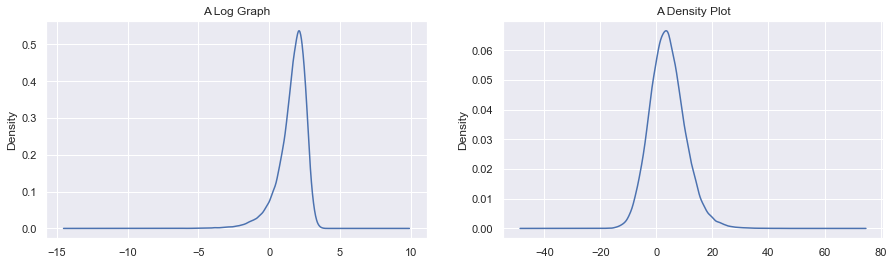

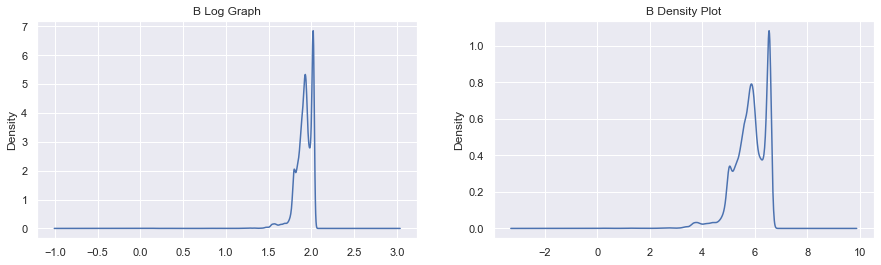

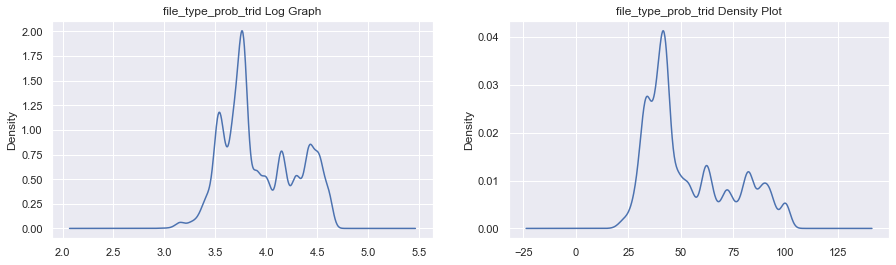

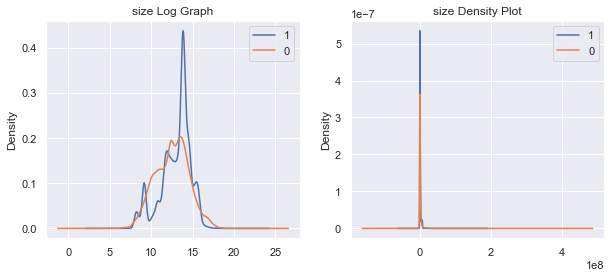

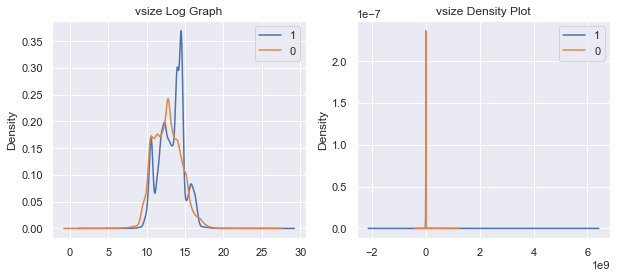

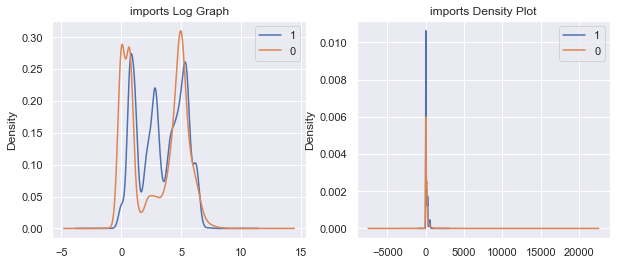

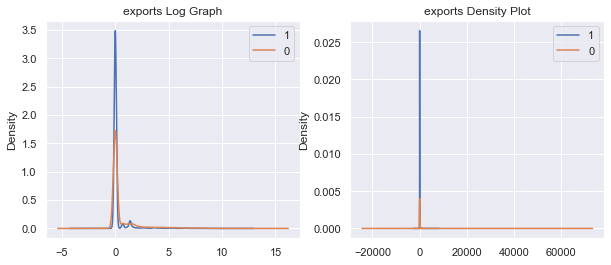

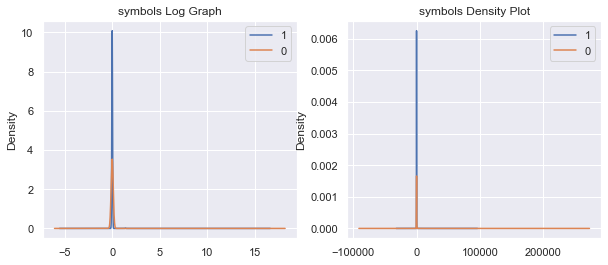

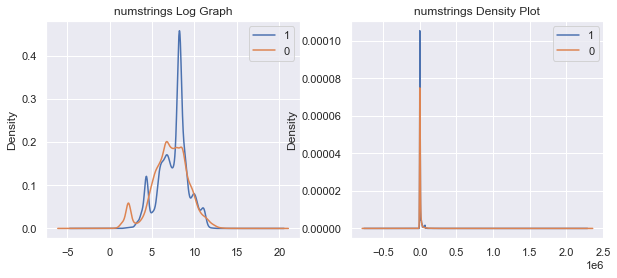

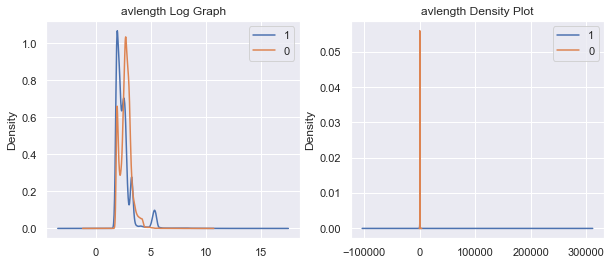

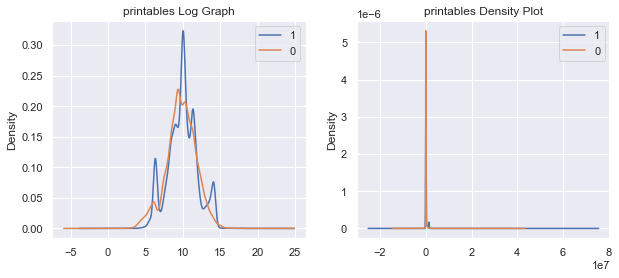

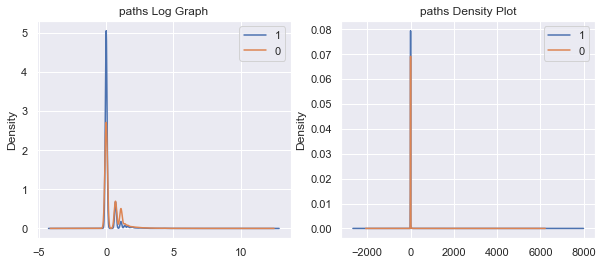

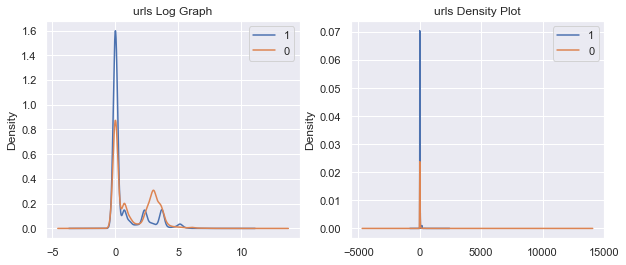

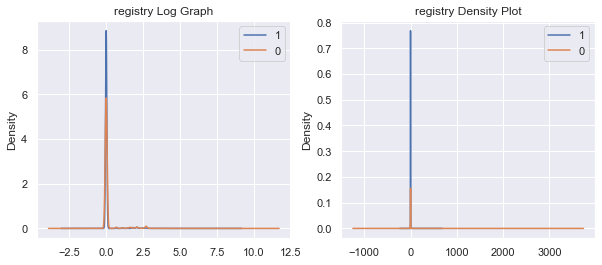

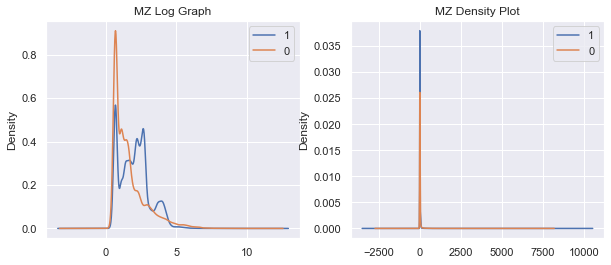

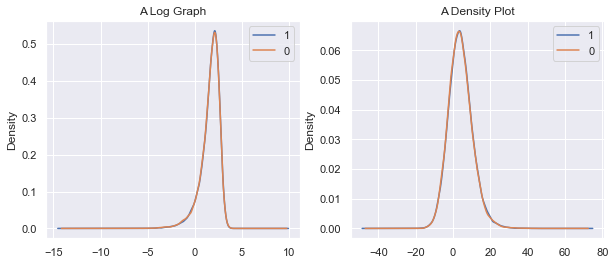

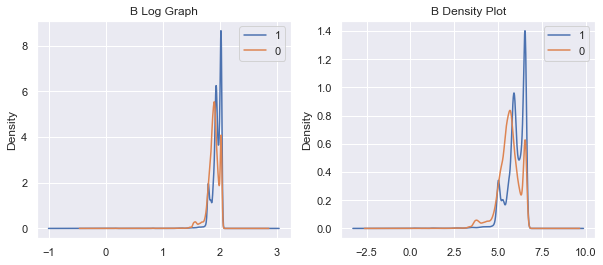

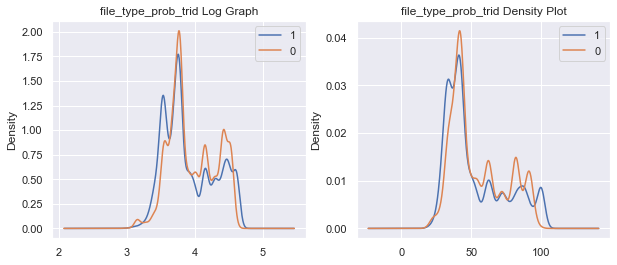

In [8]:
#some basic steps i think are important
num_features = df.shape[1]
num_observations = df.shape[0]
print(f"There are {num_observations} observations")

catagorial = ['label', 'has_debug', 'has_tls', 'has_resources', 'has_relocations', 'has_signature', 'C','file_type_trid']
numerical = ['size', 'vsize', 'imports', 'exports', 'symbols', 'numstrings', 'avlength', 'printables', 'paths', 'urls', 'registry', 'MZ', 'A', 'B', 'file_type_prob_trid']

norm_features = []
# Creating a boxplot for each numerical feature

ones = np.ones(main_df.shape[0])
for cat in catagorial:
    if ('type' in cat):
        continue
    main_df[cat].value_counts().plot.barh()
    plt.title(cat)
    plt.show()

# not by labels
for cat in numerical:

    fig, axes = plt.subplots(1, 2, figsize=(15, 4))

    curr = np.log(ones + main_df[cat])
    curr.plot.density(ax=axes[0])

    
    main_df['Log of '+cat] = curr

    main_df[cat].plot.density(ax=axes[1])

    axes[0].set_title(cat + " Log Graph")
    axes[1].set_title(cat + " Density Plot")

    plt.show()

# by labels
for cat in numerical:

    fig, axes = plt.subplots(1, 2, figsize=(10 , 4))

    curr = np.log(ones + main_df[cat])
    curr[main_df['label'] == 1].plot.density(ax=axes[0], label = '1')
    curr[main_df['label'] == 0].plot.density(ax=axes[0], label= '0')

    
    main_df['Log of '+cat] = curr

    main_df[main_df['label'] == 1][cat].plot.density(ax=axes[1], label= '1')
    main_df[main_df['label'] == 0][cat].plot.density(ax=axes[1], label= '0')

    axes[0].legend()
    axes[1].legend()
    axes[0].set_title(cat + " Log Graph")
    axes[1].set_title(cat + " Density Plot")

    plt.show()
    test_statistic, p_value = stats.shapiro(main_df[cat])
    if (p_value > 0.05):
        norm_features = norm_features + [cat]
    test_statistic, p_value = stats.shapiro(curr)
    if (p_value > 0.05):
        norm_features = norm_features + ['Log of '+cat]



    main_df.describe()  

Based on the the graphs we've shown, lets assume the following features are normally distributed:

1. Log of size
2. log of vsize
3. log of numstrings
4. log of avglength (a bit sqewed, but both with logic we would assume that anything regarding length/size should distribute normally)
5. log of printabels
6. 'A'

this will help us clear outliers.

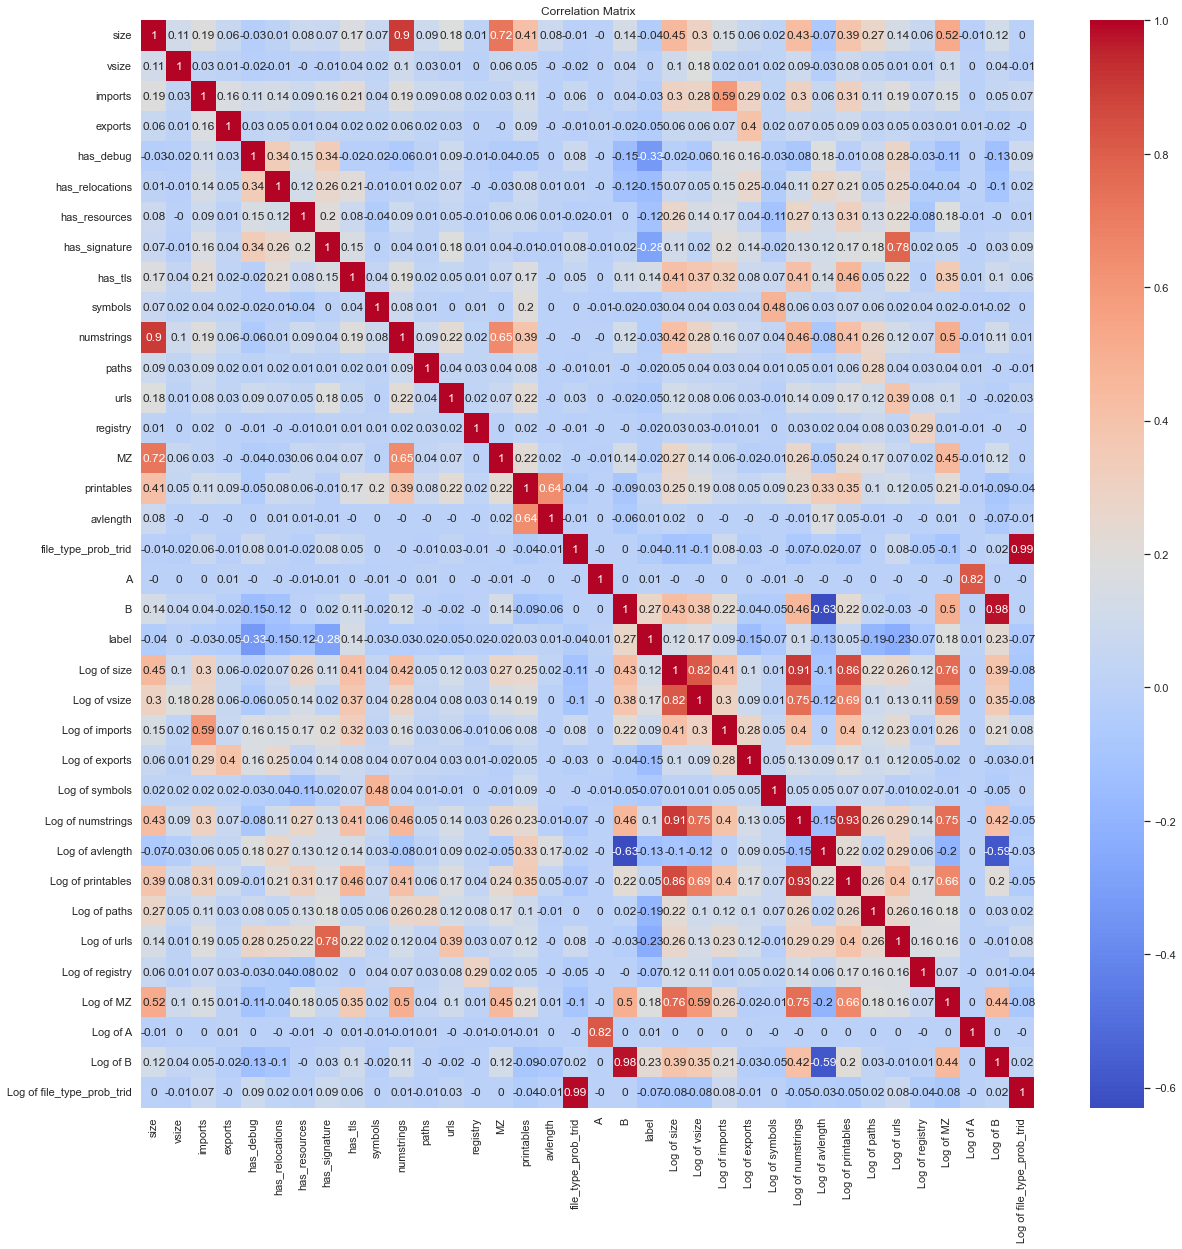

In [9]:

corr_matrix = main_df.corr().round(2)
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)
plt.title("Correlation Matrix")
plt.show()

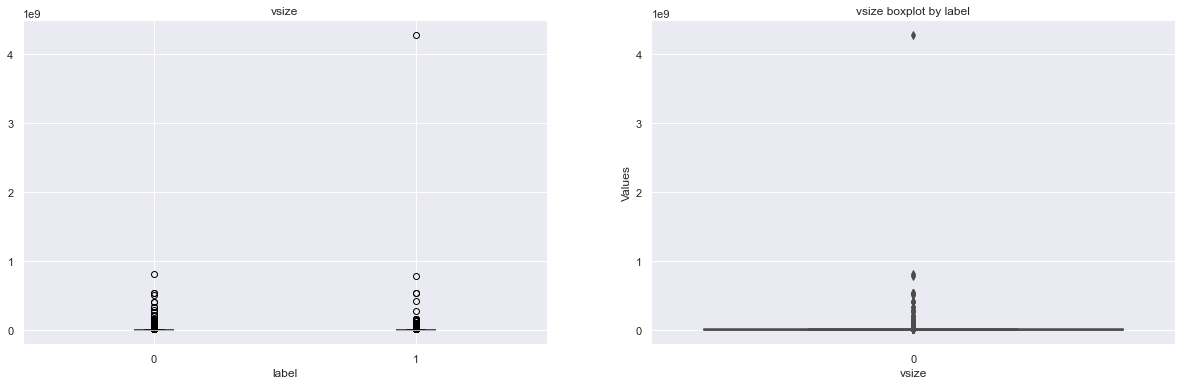

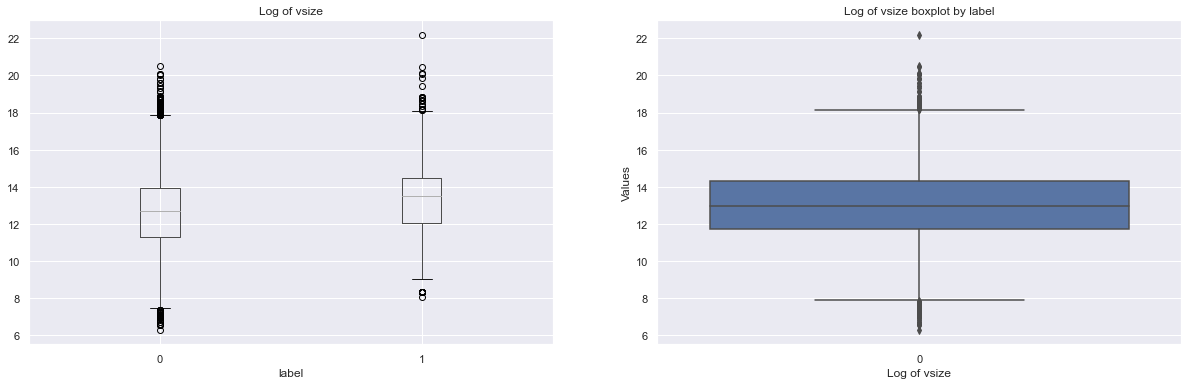

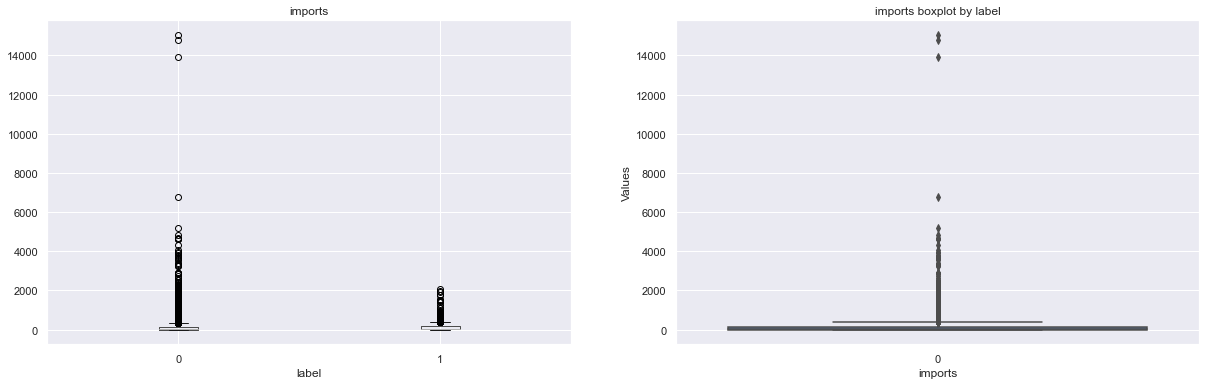

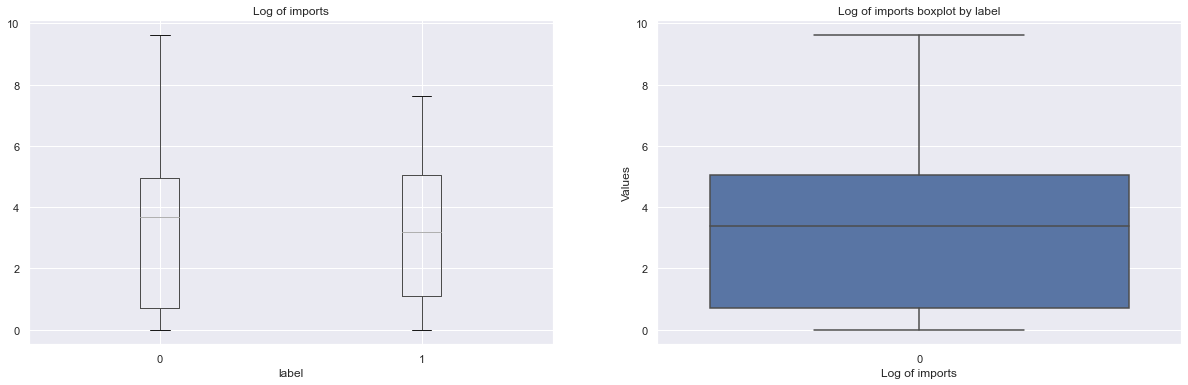

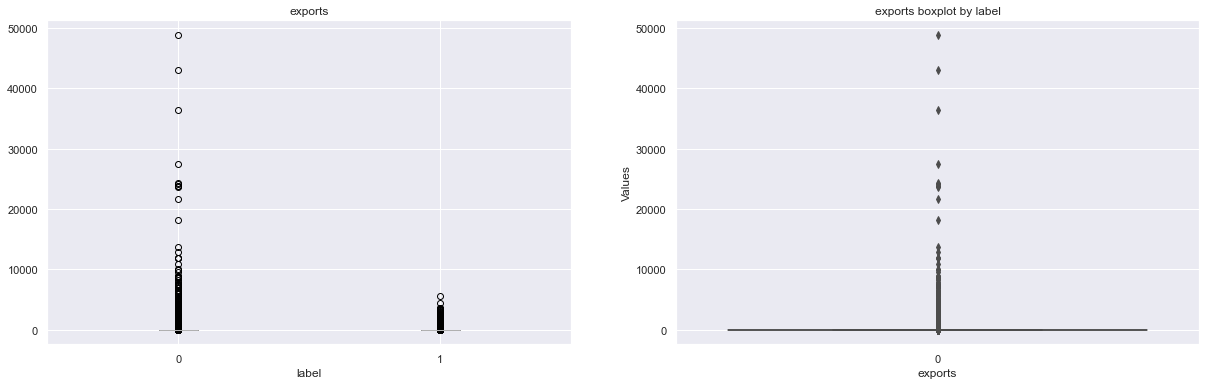

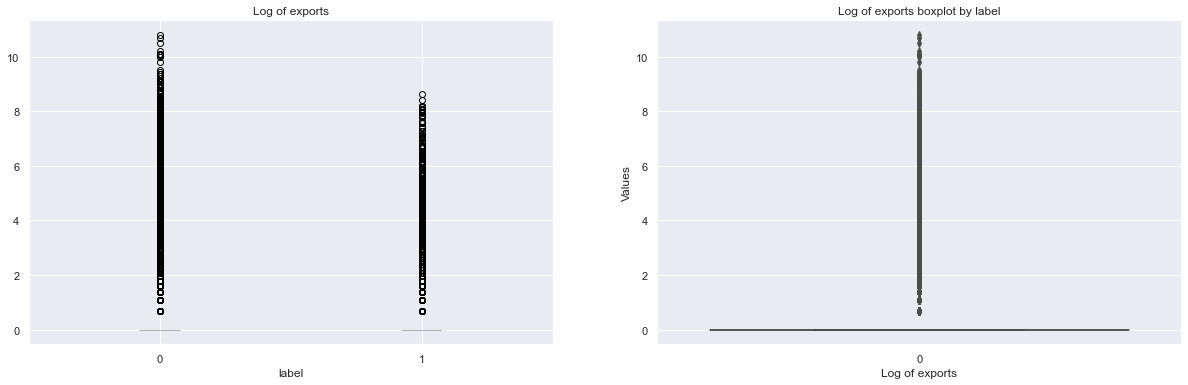

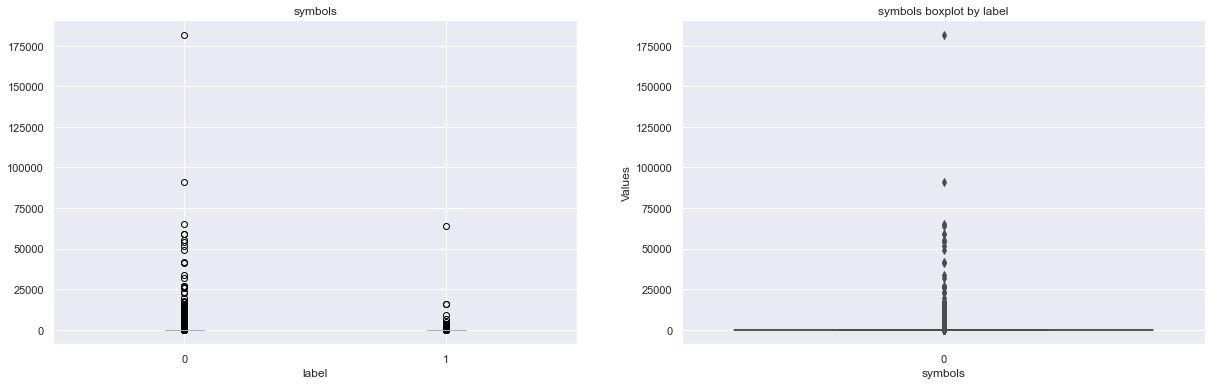

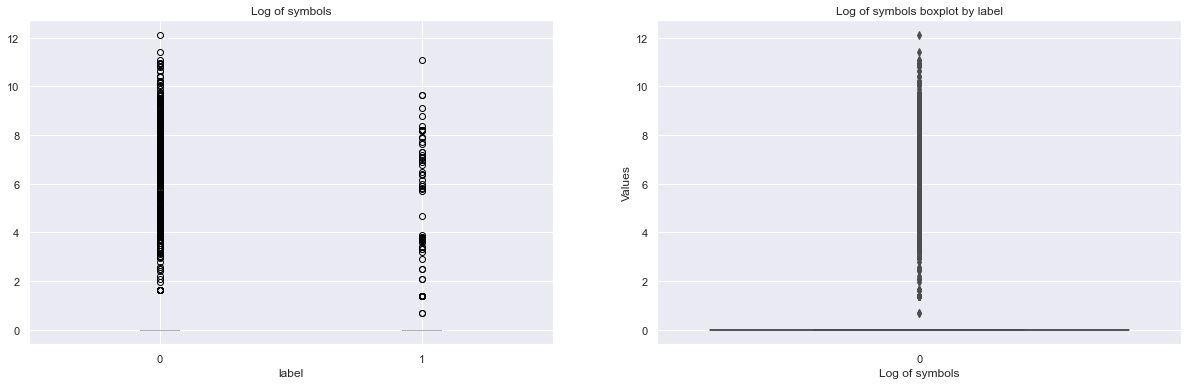

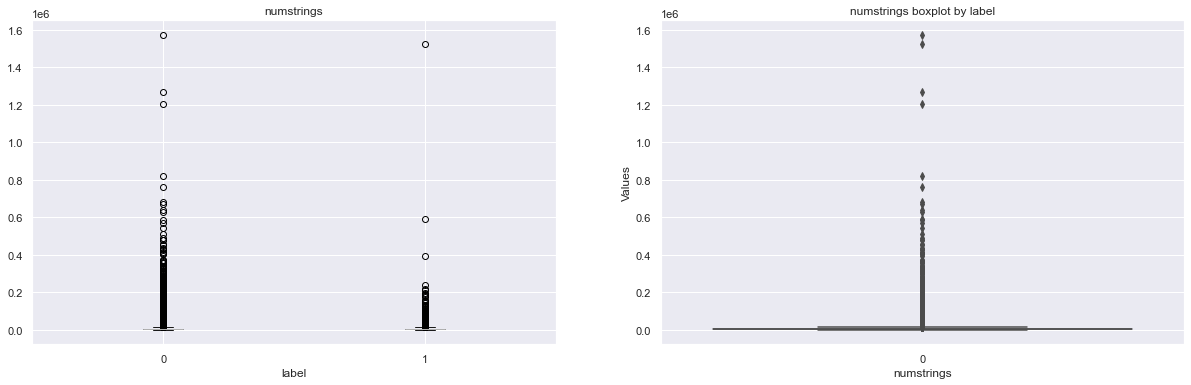

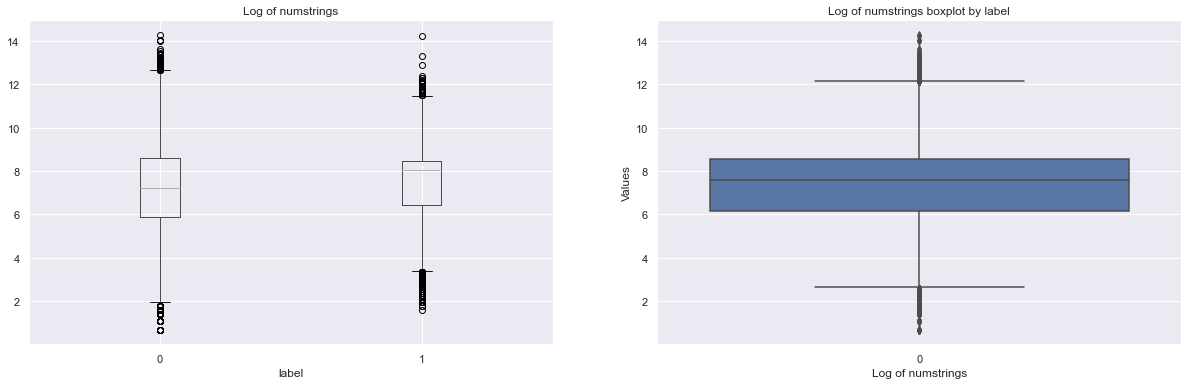

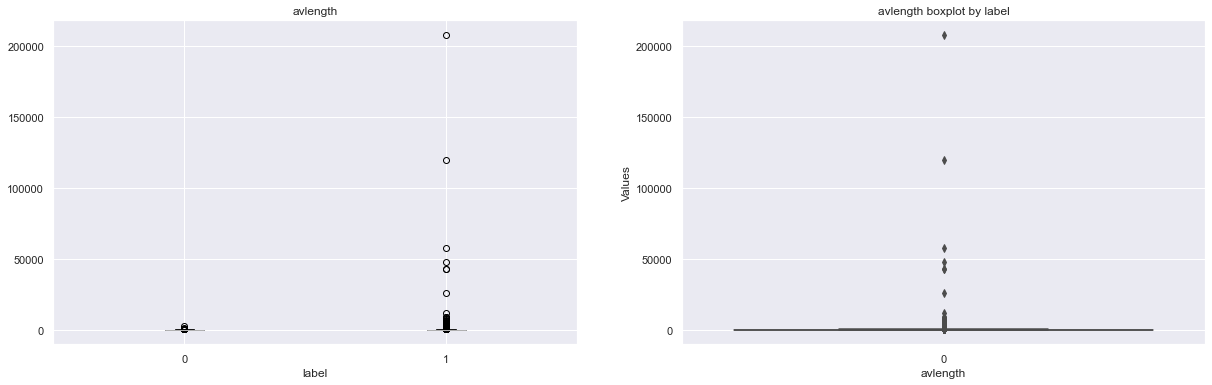

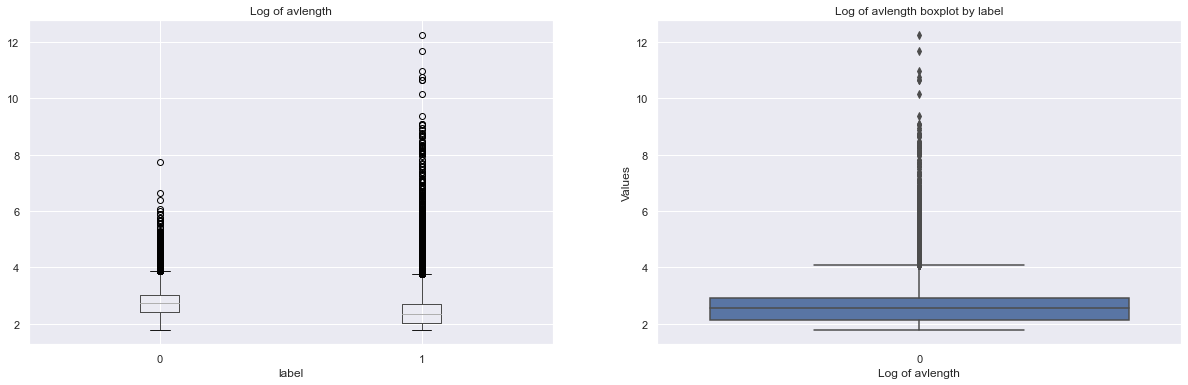

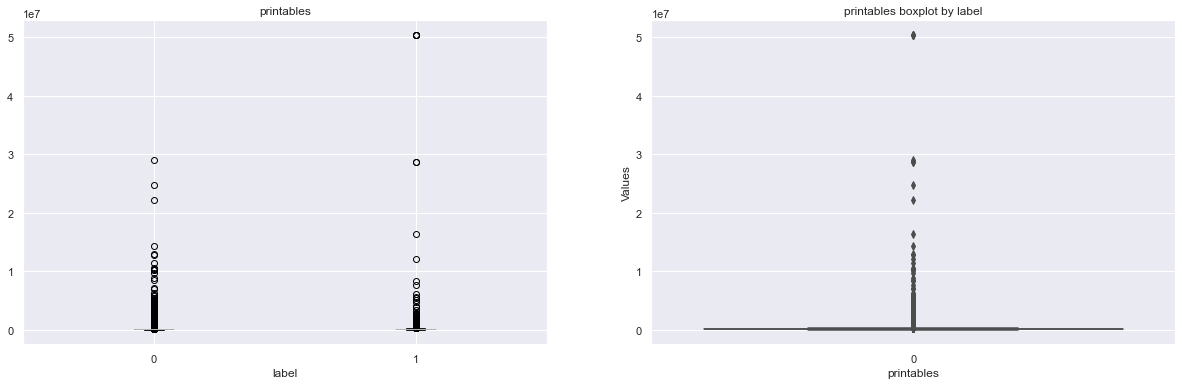

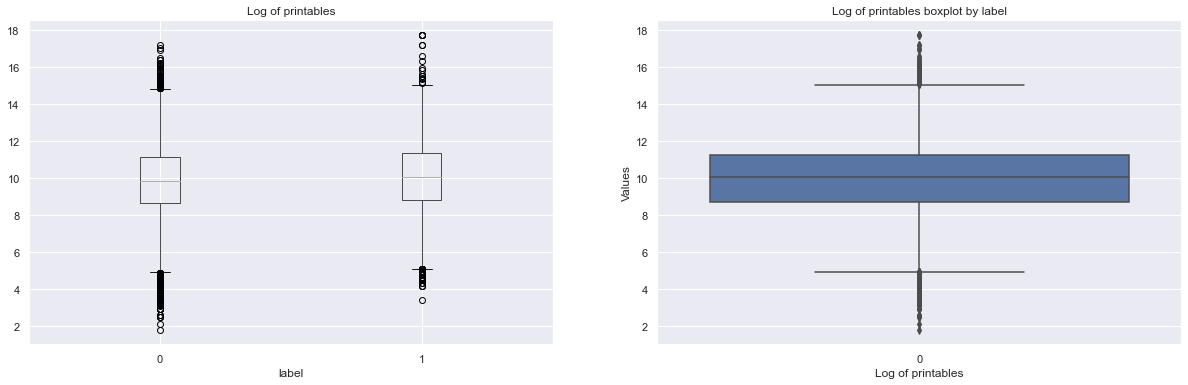

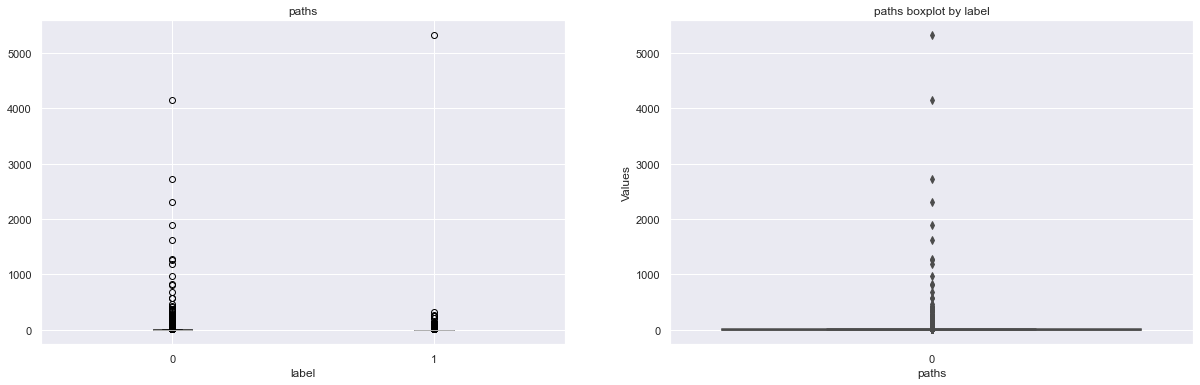

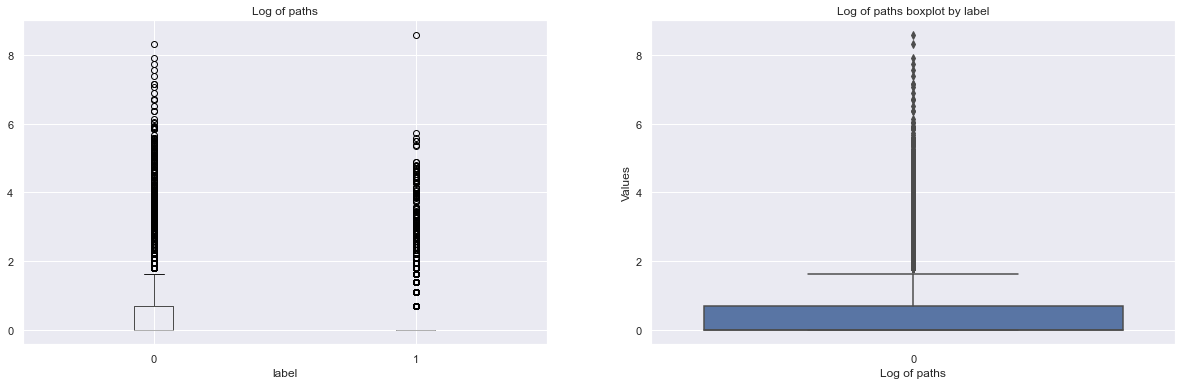

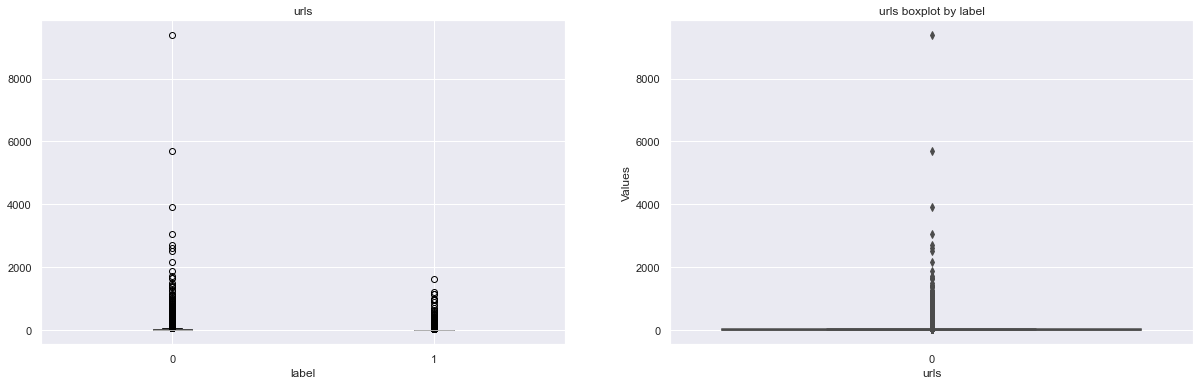

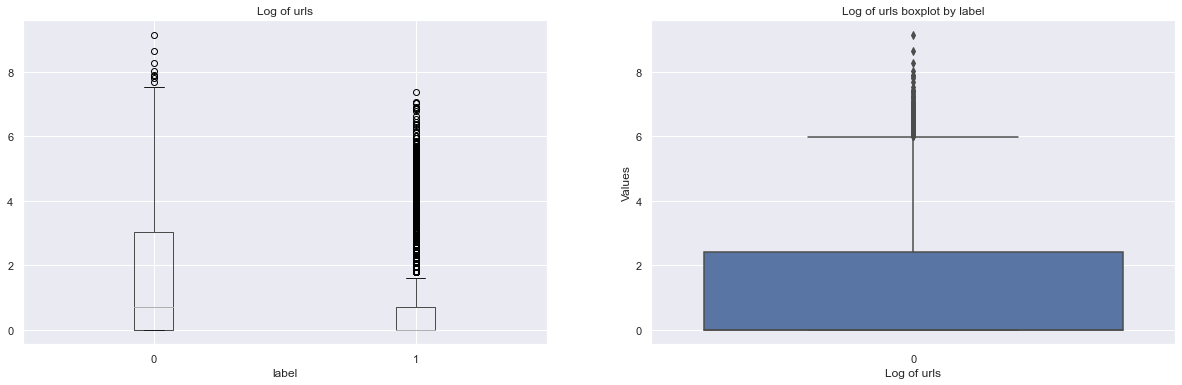

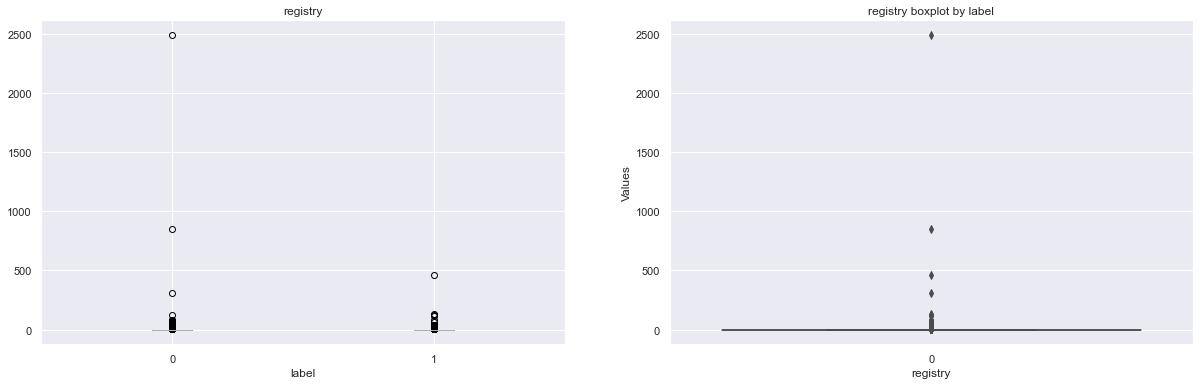

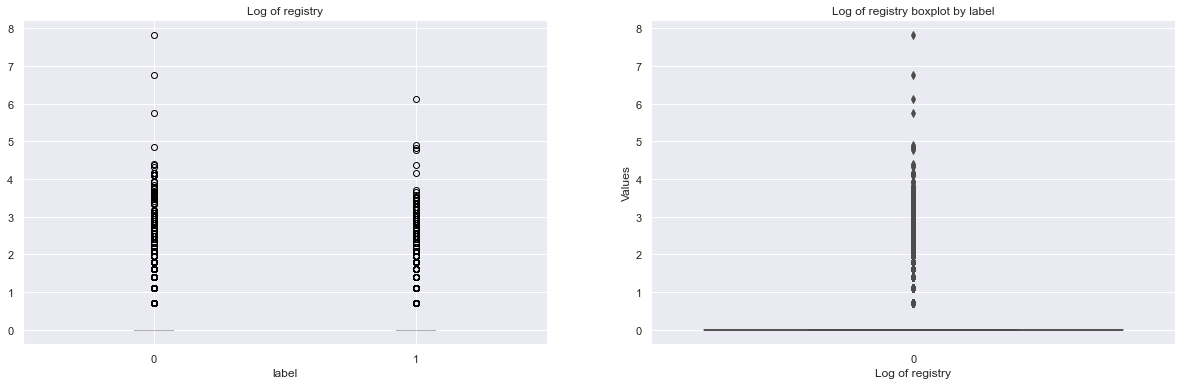

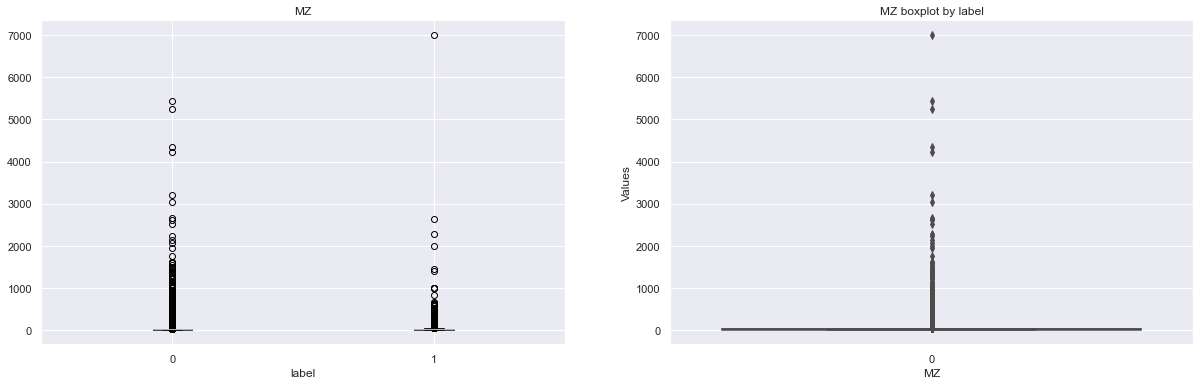

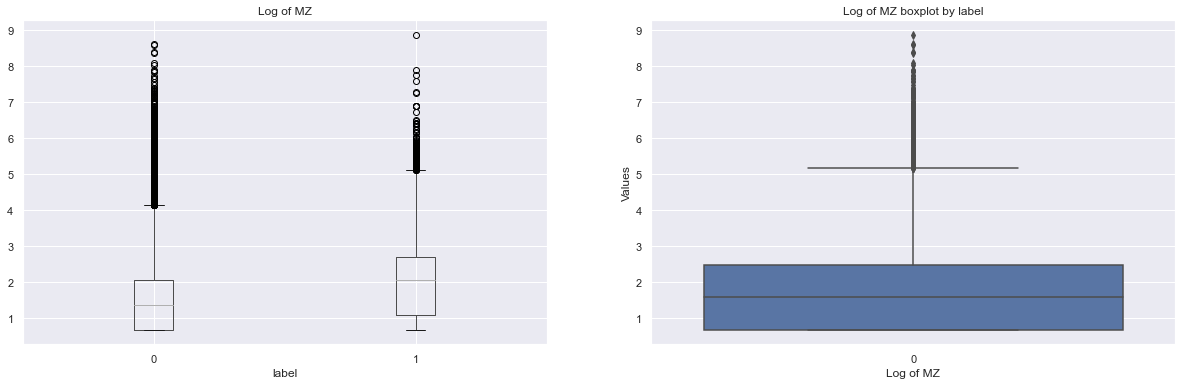

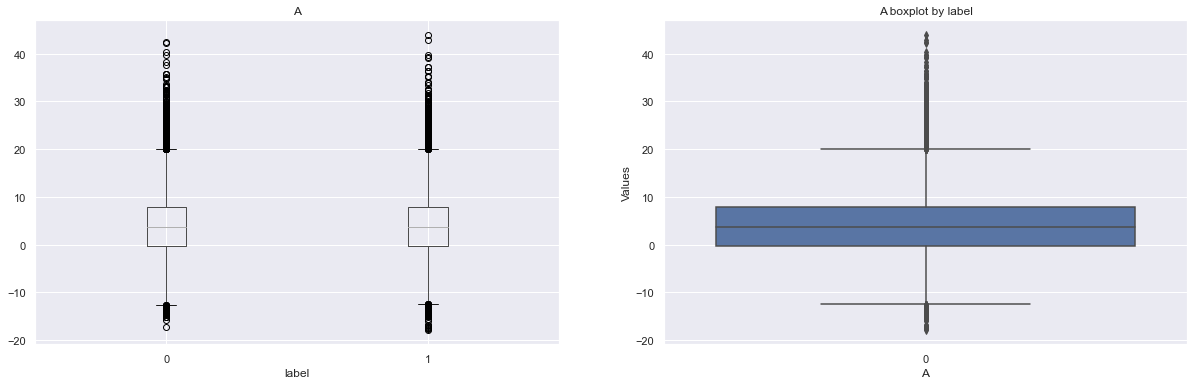

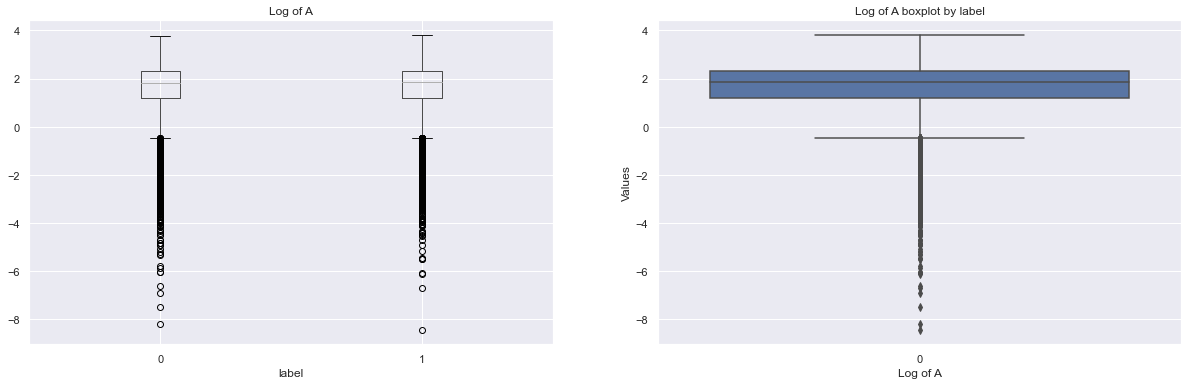

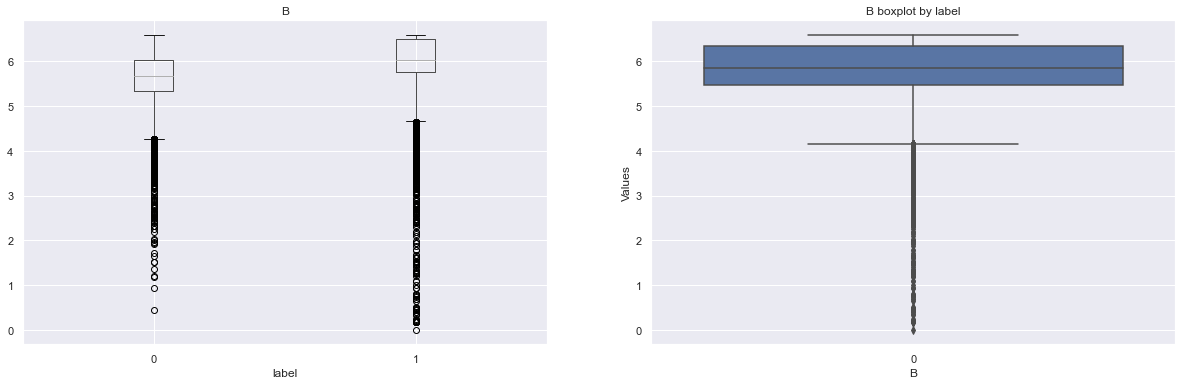

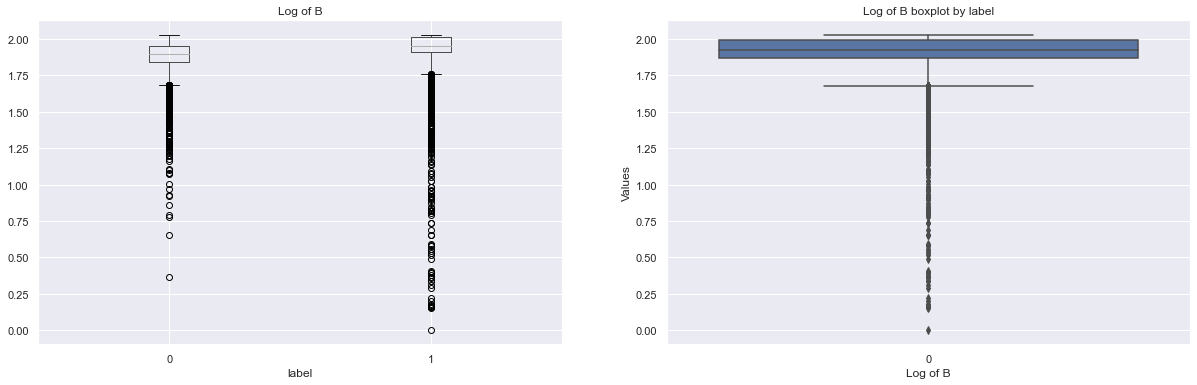

In [10]:
norm_data = main_df[norm_features]

for col in norm_features:
    fig, axes = plt.subplots(1, 2, figsize=(20, 6))  # Adjust the figure size if needed
    sns.boxplot(data=norm_data[col], ax=axes[1])
    plt.xlabel(col)
    plt.ylabel('Values')
    plt.title(f'Boxplot of {col}')  
    
    main_df.boxplot(column = col, by = 'label', ax=axes[0])
    plt.suptitle('')
    plt.title(col + " boxplot by label")
    plt.show()

    

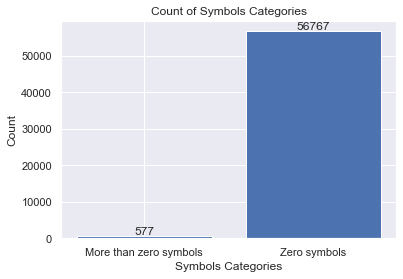

In [11]:
more_than_zero_symbols = len(main_df[main_df['symbols'] > 0])
zero_symbols = len(main_df[main_df['symbols'] == 0])

symbols_categories = ['More than zero symbols', 'Zero symbols']
symbols_counts = [more_than_zero_symbols, zero_symbols]

plt.bar(symbols_categories, symbols_counts)
plt.xlabel('Symbols Categories')
plt.ylabel('Count')
plt.title('Count of Symbols Categories')

# Add numbers on top of each bar
for i, count in enumerate(symbols_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
    
plt.show()

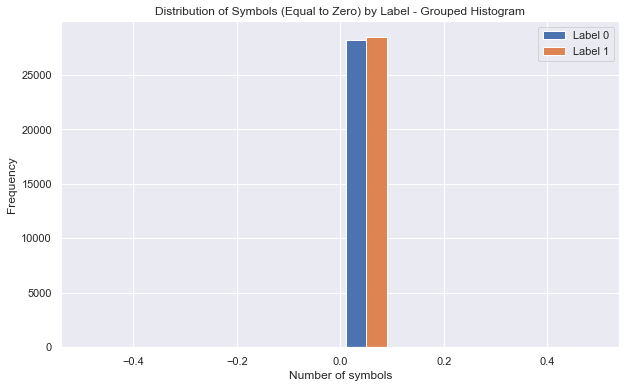

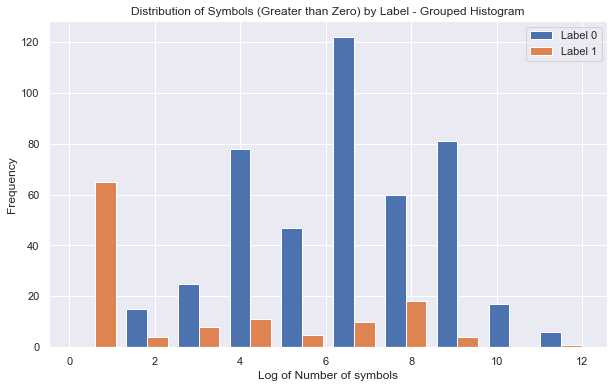

In [12]:

zero_symbols_label_0 = main_df[(main_df['symbols'] == 0) & (main_df['label'] == 0)]['symbols']
zero_symbols_label_1 = main_df[(main_df['symbols'] == 0) & (main_df['label'] == 1)]['symbols']
plt.figure(figsize=(10, 6))
# Grouped Histogram
plt.hist([zero_symbols_label_0, zero_symbols_label_1], bins=10, label=['Label 0', 'Label 1'])
plt.xlabel('Number of symbols')
plt.ylabel('Frequency')
plt.title('Distribution of Symbols (Equal to Zero) by Label - Grouped Histogram')
plt.legend()
plt.show()

bigger_zero_symbols_label_0 = main_df[(main_df['symbols'] > 0) & (main_df['label'] == 0)]['symbols']
bigger_zero_symbols_label_1 = main_df[(main_df['symbols'] > 0) & (main_df['label'] == 1)]['symbols']
plt.figure(figsize=(10, 6))
bigger_zero_symbols_label_0_log = np.log(bigger_zero_symbols_label_0)
bigger_zero_symbols_label_1_log = np.log(bigger_zero_symbols_label_1)
# Grouped Histogram
plt.hist([bigger_zero_symbols_label_0_log, bigger_zero_symbols_label_1_log], bins=10, label=['Label 0', 'Label 1'])
plt.xlabel('Log of Number of symbols')
plt.ylabel('Frequency')
plt.title('Distribution of Symbols (Greater than Zero) by Label - Grouped Histogram')
plt.legend()
plt.show()



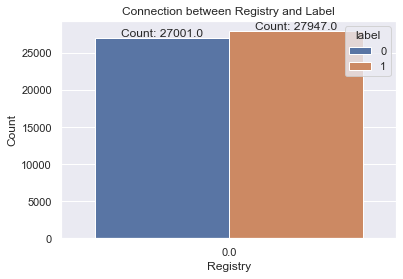

Number of Labels that are 1 with registry 0: 27947
Number of Labels that are 0 with registry 0: 27001


In [13]:
df_registry_0 = main_df[main_df['registry']==0]

# Create a count plot
ax = sns.countplot(data=df_registry_0, x='registry', hue='label')

# Get the counts
label_1_registry_0 = len(df_registry_0[df_registry_0['label'] == 1])
label_0_registry_0 = len(df_registry_0[df_registry_0['label'] == 0])

# Annotate the bars with count values
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f"Count: {p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), 
                    ha='center', va='bottom')

# Set labels and title
plt.xlabel('Registry')
plt.ylabel('Count')
plt.title('Connection between Registry and Label')

# Display the plot
plt.show()

# Print the counts
print(f"Number of Labels that are 1 with registry 0: {label_1_registry_0}")
print(f"Number of Labels that are 0 with registry 0: {label_0_registry_0}")

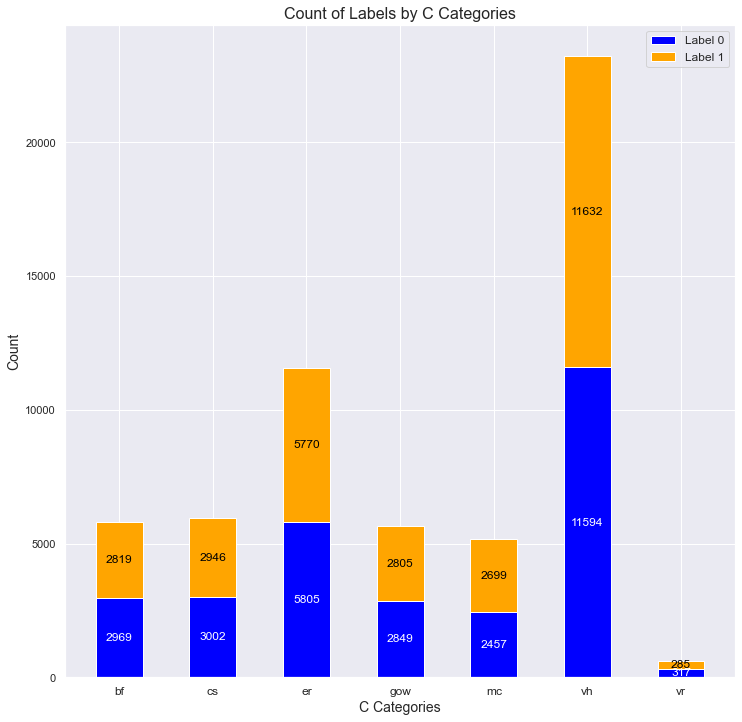

In [14]:
#comparing the distribution of safe and malicious files across different categories ('C'). 
grouped_data = main_df.groupby(['C', 'label']).size().unstack()
plt.figure(figsize=(12, 12))
colors = ['blue', 'orange']
num_categories = len(grouped_data)
bar_width = 0.5
bar_positions = np.arange(num_categories)
plt.bar(bar_positions, grouped_data[0], color=colors[0], width=bar_width, label='Label 0')
plt.bar(bar_positions, grouped_data[1], color=colors[1], width=bar_width, bottom=grouped_data[0], label='Label 1')
plt.xticks(bar_positions, grouped_data.index)
plt.xticks(bar_positions, grouped_data.index, fontsize=12)
plt.xlabel('C Categories', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Count of Labels by C Categories', fontsize=16)
plt.legend(fontsize=12)

# Increase the gap between count numbers
label_0_offset = 0.15
label_1_offset = 0.3

# Add numbers for label 0
for i in range(num_categories):
    plt.text(bar_positions[i], grouped_data.iloc[i, 0] / 2, f'{grouped_data.iloc[i, 0]}', ha='center', va='center', color='white')

# Add numbers for label 1
for i in range(num_categories):
    plt.text(bar_positions[i], grouped_data.iloc[i, 0] + grouped_data.iloc[i, 1] / 2, f'{grouped_data.iloc[i, 1]}', ha='center', va='center', color='black')

plt.show()

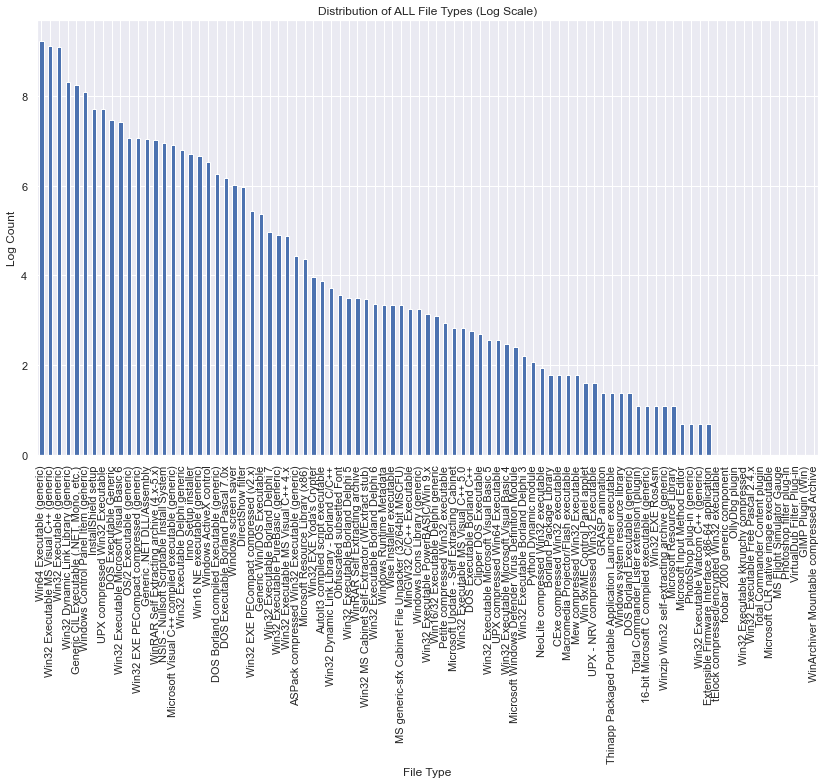

In [15]:
file_type_counts = main_df['file_type_trid'].value_counts()
log_counts = np.log(file_type_counts)

# Plot the bar chart with log-transformed counts
plt.figure(figsize=(14, 8))
log_counts.plot(kind='bar')
plt.xlabel('File Type')
plt.ylabel('Log Count')
plt.title('Distribution of ALL File Types (Log Scale)')
plt.xticks(rotation=90)
plt.show()

New feature idea: we will plot a pie chart just to see the most common words, so we can mutate it to catagorial features (dummy features) with 0 or 1

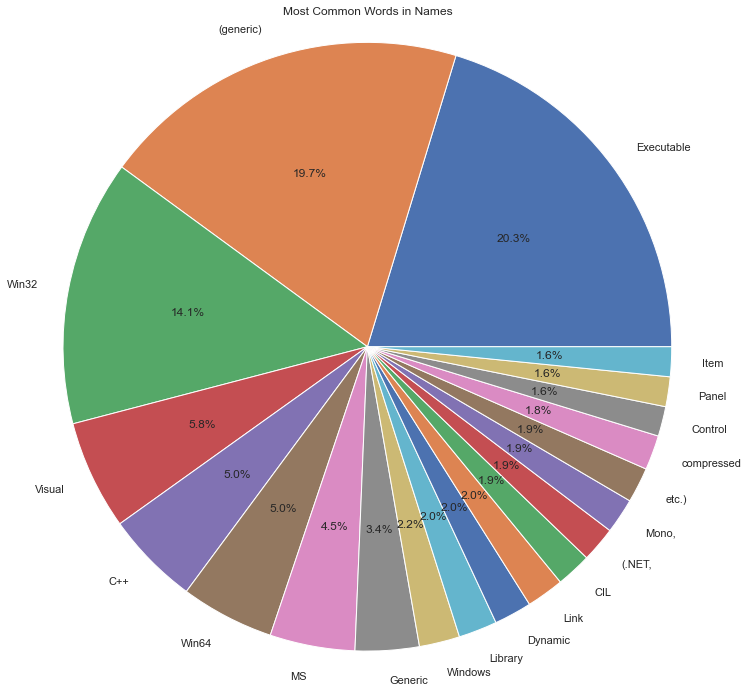

In [29]:
all_names = ' '.join(main_df['file_type_trid'].astype(str))

# Split the string into individual words
words = all_names.split()

# Create a dictionary to store word frequencies
word_counts = {}

# Count the frequency of each word
for word in words:
    if word in word_counts:
        word_counts[word] += 1
    else:
        word_counts[word] = 1

# Sort the word frequencies in descending order
sorted_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Get the most common words and their counts
most_common_words = sorted_counts[:20]  # Adjust the number (5 in this case) as desired

# Extract the labels and counts from the most common words
labels = [word[0] for word in most_common_words]
counts = [word[1] for word in most_common_words]

# Plot the pie chart
plt.figure(figsize=(12, 12))
plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Most Common Words in Names')
plt.axis('equal')
plt.show()

In [30]:
#we can make new features of: is_exe, is_generic and is_win32
cat_df = df.copy()
# Create new features
at_df = df.copy()
cat_df['is_exe'] = np.zeros(cat_df.shape[0])
cat_df.loc[cat_df['file_type_trid'].str.contains('Executable'), 'is_exe'] = 1

cat_df['is_generic'] = np.zeros(cat_df.shape[0])
cat_df.loc[cat_df['file_type_trid'].str.contains('(generic)'), 'is_generic'] = 1

cat_df['is_win32'] = np.zeros(cat_df.shape[0])
cat_df.loc[cat_df['file_type_trid'].str.contains('Win32'), 'is_win32'] = 1



Understanding the affects of the file type on the label

In [18]:
### we will do a contingency test between is_exe, is_genereic, and is_win32 and label

for feature in ['is_exe', 'is_generic', 'is_win32']:
    contingency_table = pd.crosstab(cat_df[feature], cat_df['label'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    
    print(f"Feature: {feature}")
    print(f"Contingency Table:\n{contingency_table}\n")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value:{p_value:.10f}")
    print("")


Feature: is_exe
Contingency Table:
label       0      1
is_exe              
0.0      9034   9718
1.0     20966  20282

Chi-square statistic: 36.18613238792672
P-value:0.0000000018

Feature: is_generic
Contingency Table:
label           0      1
is_generic              
0.0          9529   9601
1.0         20471  20399

Chi-square statistic: 0.3868551119783496
P-value:0.5339571380

Feature: is_win32
Contingency Table:
label         0      1
is_win32              
0.0       16907  14382
1.0       13093  15618

Chi-square statistic: 425.49057948123357
P-value:0.0000000000



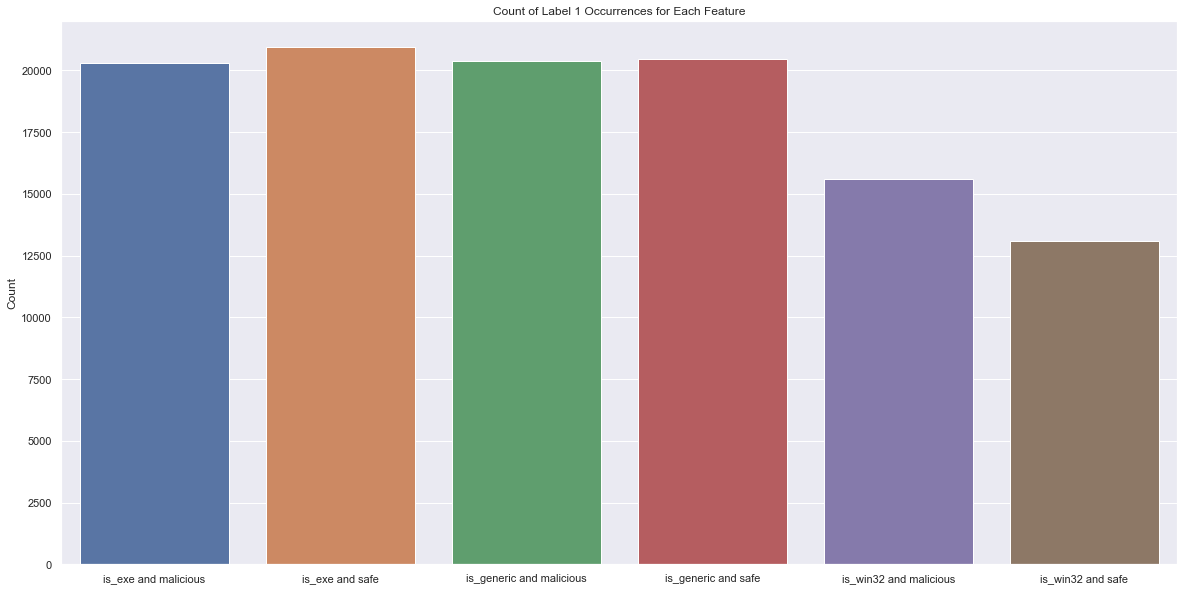

In [44]:
counts = [
    len(cat_df[(cat_df['is_exe'] == 1) & (cat_df['label'] == 1)]),
    len(cat_df[(cat_df['is_exe'] == 1) & (cat_df['label'] == 0)]),
    len(cat_df[(cat_df['is_generic'] == 1) & (cat_df['label'] == 1)]),
    len(cat_df[(cat_df['is_generic'] == 1) & (cat_df['label'] == 0)]),
    len(cat_df[(cat_df['is_win32'] == 1) & (cat_df['label'] == 1)]),
    len(cat_df[(cat_df['is_win32'] == 1) & (cat_df['label'] == 0)])
]

# Create a bar plot
plt.figure(figsize=(20,10))
sns.barplot(x=['is_exe and malicious','is_exe and safe', 'is_generic and malicious','is_generic and safe', 'is_win32 and malicious', 'is_win32 and safe'], y=counts)
plt.title('Count of Label 1 Occurrences for Each Feature')

plt.ylabel('Count')
plt.show()


What can we understand? there is a relationship between is_win32 and label, and is_exe and label, which is non linear (because there is no corr in the corrmatrix), if we pick an alpha (significance level) even of a 0.00001 (which is very small) we can see that the features are related

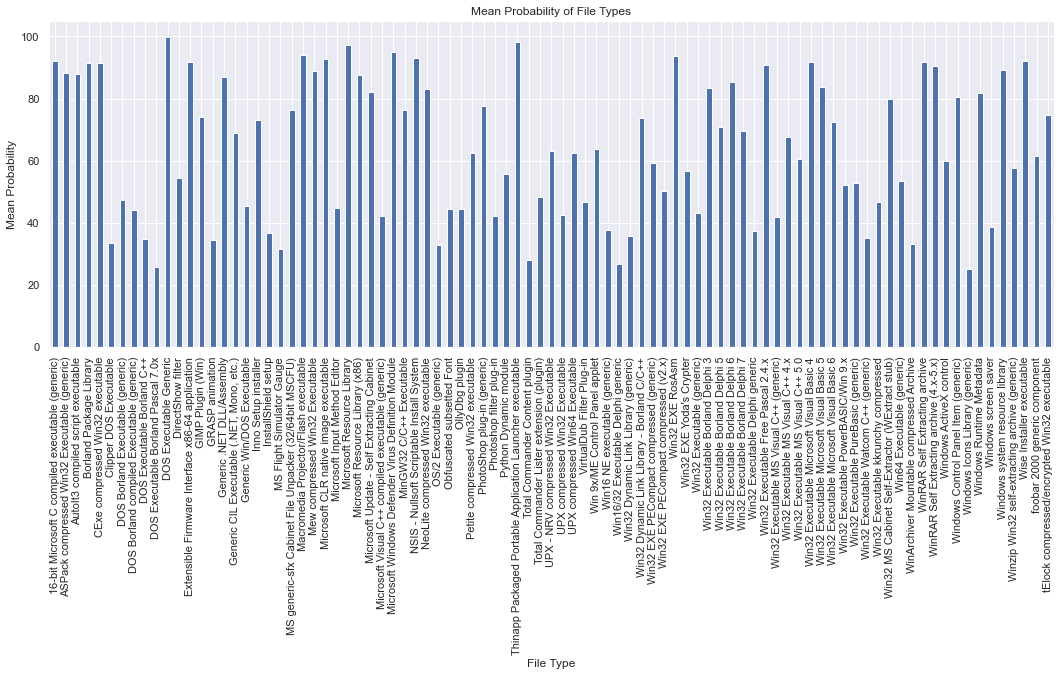

In [20]:
#In this code, we group the data by "file_type_trid" and calculate the mean probability ("file_type_prob_trid") for each file type. 
# Then, we create a bar plot where each bar represents a file type, 
# and the height of each bar corresponds to the mean probability of that file type.

# Group the data by file_type_trid and calculate the mean probability for each file type
file_type_prob_means = main_df.groupby('file_type_trid')['file_type_prob_trid'].mean()

# Plot the bar chart
plt.figure(figsize=(18, 6))
file_type_prob_means.plot(kind='bar')
plt.xlabel('File Type')
plt.ylabel('Mean Probability')
plt.title('Mean Probability of File Types')
plt.xticks(rotation=90)
plt.show()

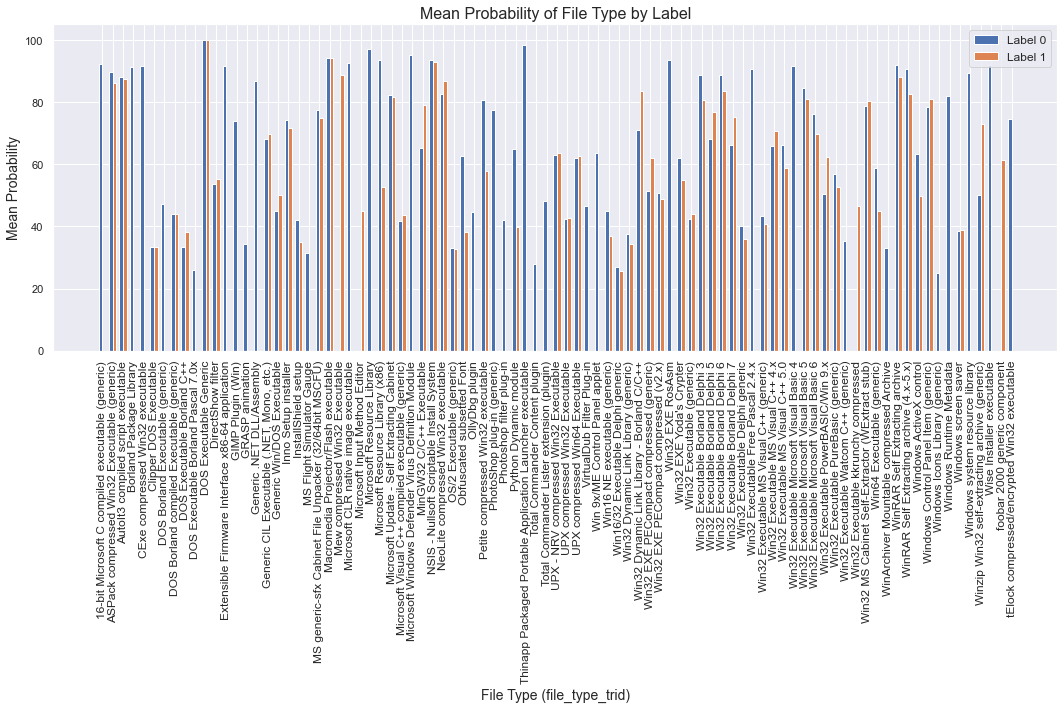

In [21]:
# Group the data by file_type_trid and label, and calculate the mean probabilities
grouped_data = main_df.groupby(['file_type_trid', 'label'])['file_type_prob_trid'].mean().unstack()

# Plotting the grouped bar chart
plt.figure(figsize=(18, 6))
bar_width = 0.35
bar_positions = np.arange(len(grouped_data))

# Plot bars for label 0
plt.bar(bar_positions - bar_width/2, grouped_data[0], width=bar_width, label='Label 0')

# Plot bars for label 1
plt.bar(bar_positions + bar_width/2, grouped_data[1], width=bar_width, label='Label 1')

plt.xlabel('File Type (file_type_trid)', fontsize=14)
plt.ylabel('Mean Probability', fontsize=14)
plt.title('Mean Probability of File Type by Label', fontsize=16)
plt.xticks(bar_positions, grouped_data.index, rotation=90, fontsize=12)
plt.legend(fontsize=12)

plt.show()

#when the mean probabiliy is high there are more label 0 (safe files)

Top 5 Files with the Highest Label 1 Percentages:
file_type_trid
Mew compressed Win32 Executable                   100.00000
Microsoft Input Method Editor                     100.00000
Win32 Executable kkrunchy compressed              100.00000
foobar 2000 generic component                     100.00000
Winzip Win32 self-extracting archive (generic)     59.24421
dtype: float64

Average Probabilities for the Top 5 Files:
file_type_trid
Mew compressed Win32 Executable                   88.8
Microsoft Input Method Editor                     44.9
Win32 Executable kkrunchy compressed              46.7
foobar 2000 generic component                     61.5
Winzip Win32 self-extracting archive (generic)    72.9
Name: 1, dtype: float64


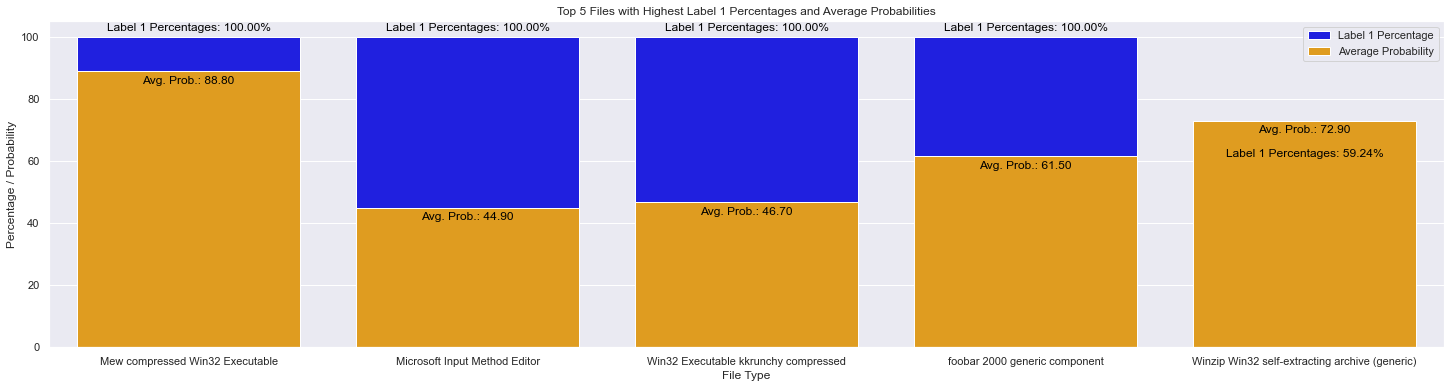

In [22]:
# Group the data by file_type_trid and label, and calculate the mean probabilities
grouped_data = main_df.groupby(['file_type_trid', 'label'])['file_type_prob_trid'].mean().unstack().fillna(0)

# Calculate the percentage of label 1 for each file type
total_counts = grouped_data.sum(axis=1)
label1_percent = grouped_data[1] / total_counts * 100

# Find the top 5 files with the highest label 1 percentages
top_label1_files = label1_percent.nlargest(5)
print("Top 5 Files with the Highest Label 1 Percentages:")
print(top_label1_files)
print()

# Calculate the average probabilities for the top 5 files
average_probabilities = grouped_data.loc[top_label1_files.index, 1]
print("Average Probabilities for the Top 5 Files:")
print(average_probabilities)

# Plot the label 1 percentages and average probabilities for the top 5 files
plt.figure(figsize=(25, 6))
sns.barplot(x=top_label1_files.index, y=top_label1_files.values, color='blue', label='Label 1 Percentage')
sns.barplot(x=top_label1_files.index, y=average_probabilities, color='orange', label='Average Probability')
plt.xlabel('File Type')
plt.ylabel('Percentage / Probability')
plt.title('Top 5 Files with Highest Label 1 Percentages and Average Probabilities')
for i, percentage in enumerate(top_label1_files):
    avg_probability = average_probabilities.iloc[i]
    plt.text(i, percentage + 2, f'Label 1 Percentages: {percentage:.2f}%', ha='center', color='black')
    plt.text(i, avg_probability - 4, f'Avg. Prob.: {avg_probability:.2f}', ha='center', color='black')

plt.legend()
plt.show()

Part 2: pre-processing

first step: dealing with missing values

In [23]:
#dealing with missing values in categorial features

boolean_features = []
for cat in catagorial:
    if 'has_' in cat:
        boolean_features.append(cat)

# we will make the values of the missing values be -1 to show "UNKNOWN", however it is open for change

mut_df = cat_df.copy()
mut_df[boolean_features] = mut_df[boolean_features].fillna(-1)

# for C feature we will add an "UNKNOWN" catagory

mut_df['C'] = mut_df['C'].fillna("unknown") # will help us to make the C values into catagorial features

# for now we will make each numerical feature's NA the mean, makes sense since we say "if we don't know, we will assume the avg val"

for numeric in numerical:
    avg = np.nanmean(mut_df[numeric])
    mut_df[numeric] = mut_df[numeric].fillna(avg)
    

missing_values = mut_df.isnull().sum()
print(missing_values)

sha256                 0
size                   0
vsize                  0
imports                0
exports                0
has_debug              0
has_relocations        0
has_resources          0
has_signature          0
has_tls                0
symbols                0
numstrings             0
paths                  0
urls                   0
registry               0
MZ                     0
printables             0
avlength               0
file_type_trid         0
file_type_prob_trid    0
A                      0
B                      0
C                      0
label                  0
is_exe                 0
is_generic             0
is_win32               0
dtype: int64


Because only now we dealt with missing values, we will reassign the log value for each column, and we will split C into catagorial features

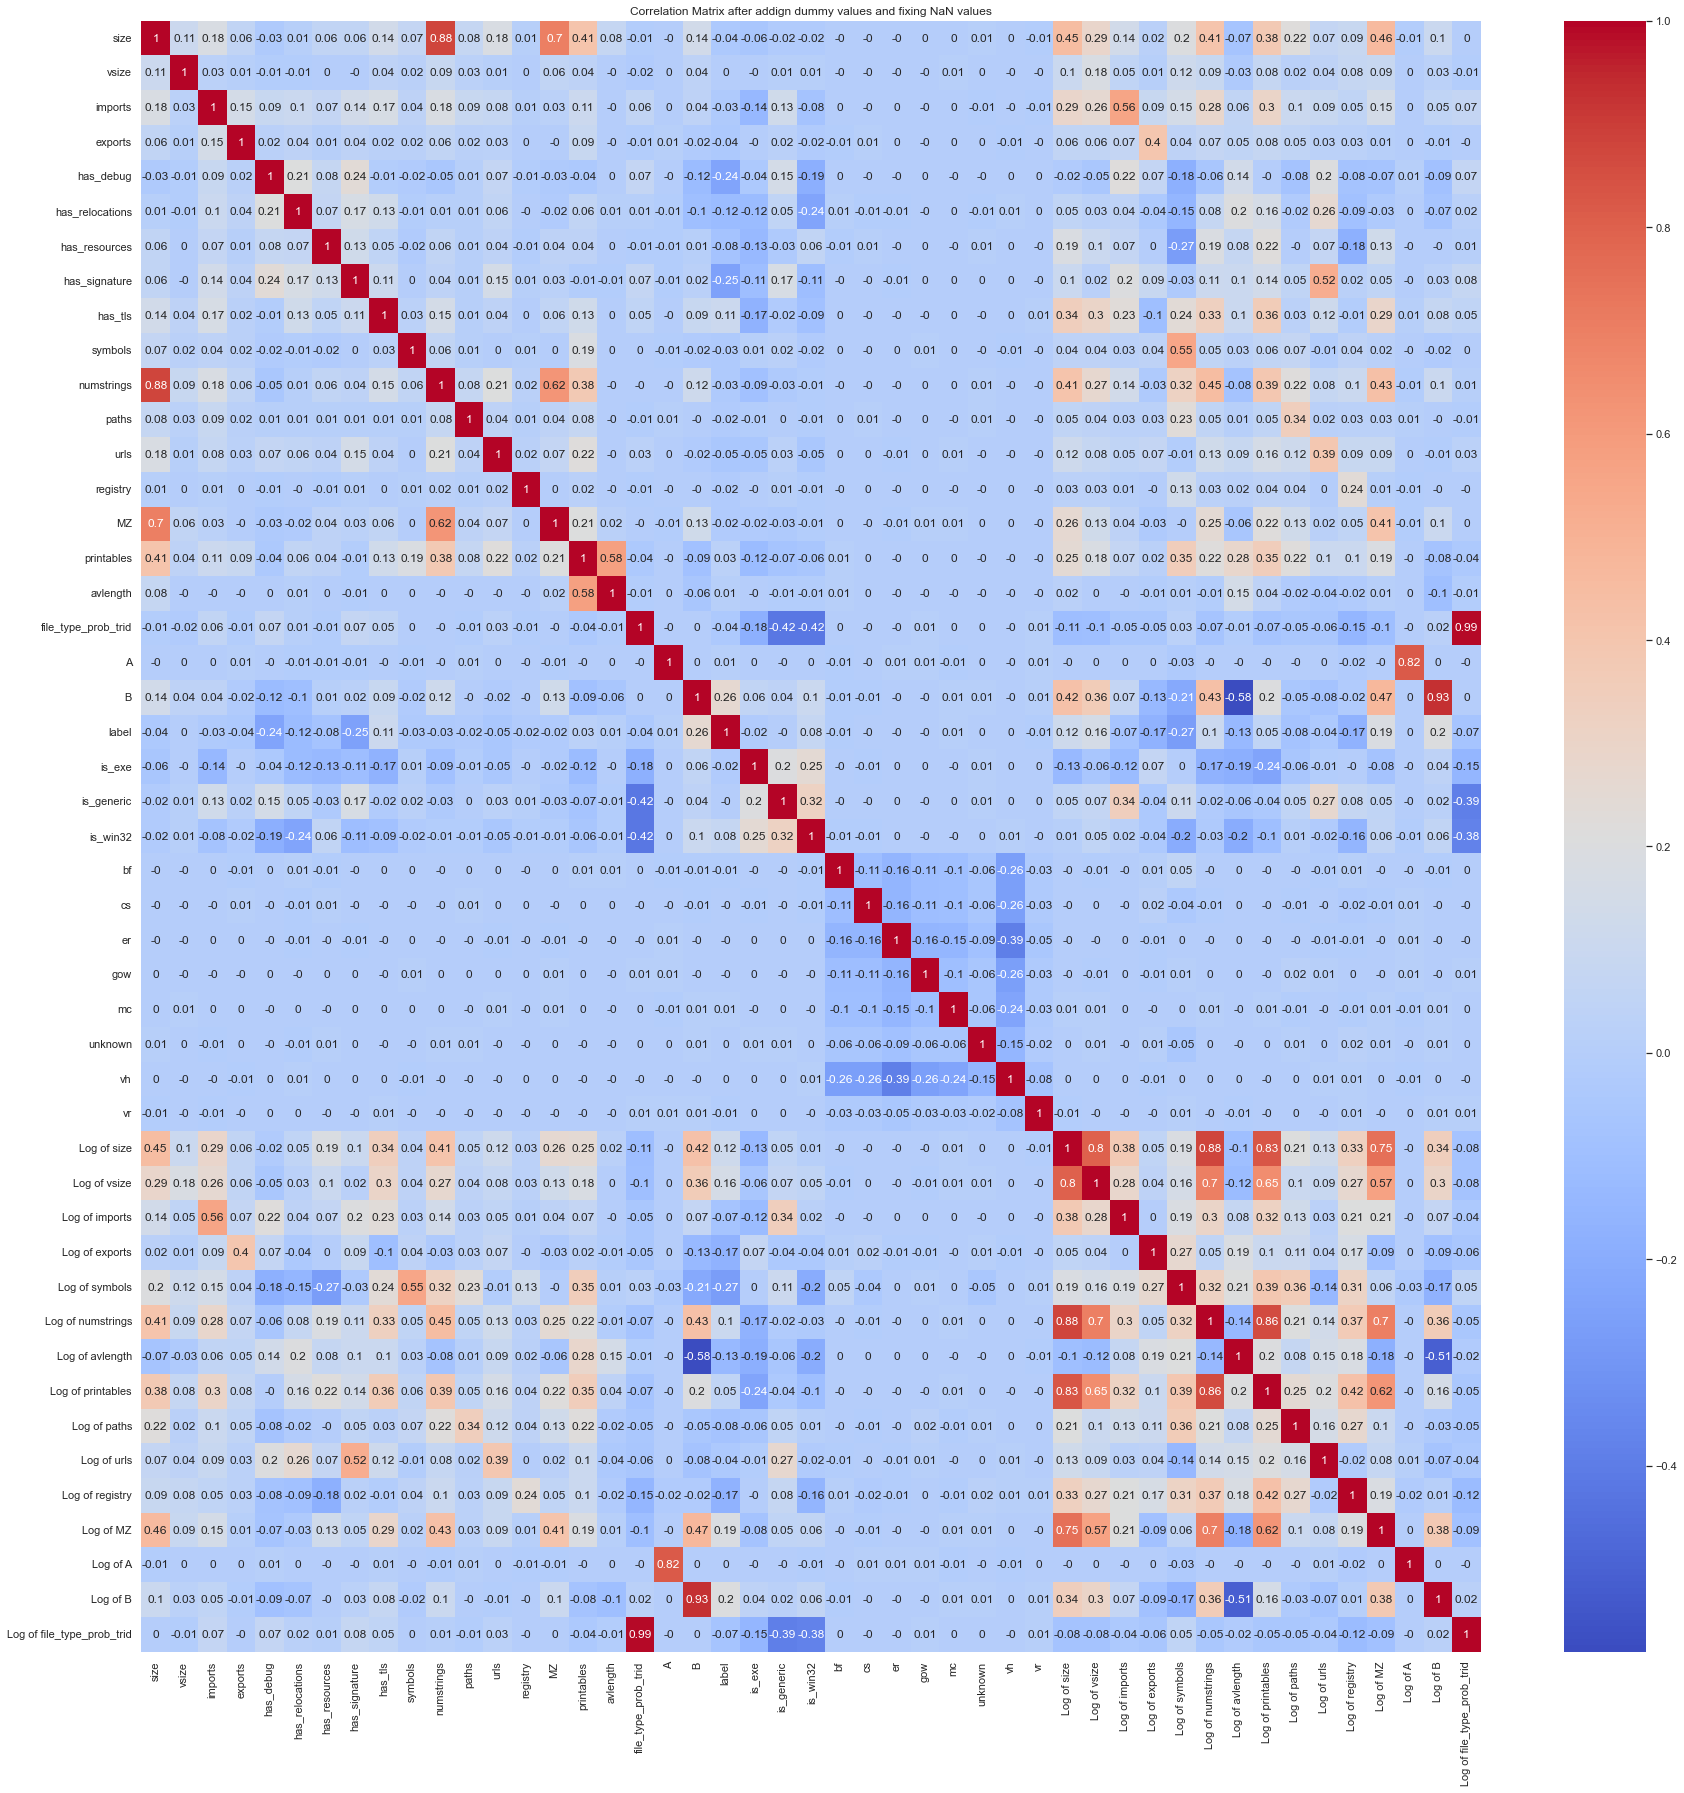

In [24]:
dummy_df = pd.get_dummies(mut_df['C'])

df_with_dummies = pd.concat([mut_df, dummy_df], axis=1)

df_with_dummies.drop("C", axis=1, inplace=True)

#### Make Log Features Just to help us later ####

for numeric in numerical:
    df_with_dummies["Log of "+numeric] = np.log(df_with_dummies[numeric])


corr_mat = df_with_dummies.corr().round(2)


# define the outliers

# we will start with normally distributed ones

norm_feat = ['A', 'Log of size', 'Log of numstrings', 'Log of avlength', 'Log of printables', 'Log of vsize']


z_scores = stats.zscore(df_with_dummies[norm_feat])

threshold = 3

df_with_dummies = df_with_dummies[(np.abs(z_scores) < threshold).all(axis=1)]



plt.figure(figsize = (30, 30))
sns.heatmap(corr_mat, cmap='coolwarm', annot=True)
plt.title("Correlation Matrix after addign dummy values and fixing NaN values")
plt.show()

Normalizing the data

In [57]:
### create a function that will normalize each feature

df_normalized = df_with_dummies.copy()
for feat in numerical:
   df_normalized.drop('Log of '+feat, inplace=True, axis=1)
for numeric in numerical:
   df_normalized[numeric] = (df_normalized[numeric]-df_normalized[numeric].min())/(df_normalized[numeric].max()-df_normalized[numeric].min())
   
df_normalized.head()


,sha256,size,vsize,imports,exports,has_debug,has_relocations,has_resources,has_signature,has_tls,symbols,numstrings,paths,urls,registry,MZ,printables,avlength,file_type_trid,file_type_prob_trid,A,B,label,is_exe,is_generic,is_win32,bf,cs,er,gow,mc,unknown,vh,vr
0,a5d72c609a1594621e8eb775e7324d4fc291d5569cfefd...,0.063212,0.086672,0.034824,0.000061,0.0,1.0,1.0,0.0,1.0,0.000000,0.126724,0.0,0.000000,0.0,0.005140,0.128631,0.073399,Win32 EXE PECompact compressed (generic),0.566061,0.281797,0.862079,1,0.0,1.0,1.0,0,0,1,0,0,0,0,0
1,ccaa49b76e6fd84842399c4389e2086a5a3687dfabbf01...,0.000196,0.000541,0.000133,0.000000,0.0,0.0,1.0,0.0,0.0,0.000000,0.000164,0.0,0.000000,0.0,0.000000,0.000114,0.038023,Win32 Dynamic Link Library (generic),0.253333,0.581111,0.863025,0,0.0,1.0,1.0,0,0,1,0,0,0,0,0
2,b0b126adc73b980a114e38027b082d149fcf491547452f...,0.006422,0.008950,0.008839,0.000082,1.0,1.0,1.0,1.0,0.0,0.000000,0.005262,0.0,0.005635,0.0,0.000190,0.004680,0.059073,Win64 Executable (generic),0.781818,0.418177,0.860522,0,1.0,1.0,0.0,0,0,0,1,0,0,0,0
3,ff6176c53ca9b58040c93870c264843b93b5e290c28e57...,0.000066,0.000437,0.000399,0.000000,0.0,0.0,0.0,0.0,0.0,0.000615,0.000129,0.0,0.000000,0.0,0.000000,0.000089,0.037450,Win64 Executable (generic),0.127273,0.449748,0.888560,1,1.0,1.0,0.0,0,0,0,0,0,0,1,0
4,59b8bc6ac157a553440978406c8aa8eb8a25c166af1175...,0.003705,0.005346,0.008839,0.000000,1.0,1.0,1.0,0.0,0.0,0.000000,0.009227,0.0,0.000000,0.0,0.000761,0.005126,0.021078,Win64 Executable (generic),0.178182,0.644454,0.874698,1,1.0,1.0,0.0,0,0,0,0,0,0,1,0
